In [81]:
!pip install shap

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/544.4 kB 660.6 kB/s eta 0:00:01
   ---- ---------------------------------- 61.4/544.4 kB 656.4 kB/s eta 0:00:01
   -------- ----------------------------- 122.9/544.4 kB 804.6 kB/s eta 0:00:01
   ---------------- ----------------------- 225.3/544.4 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 368.6/544.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.8 MB 5.9 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/2.8 MB 4.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/2.8 MB 3.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.8 MB 4.0 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU, BatchNormalization, Concatenate, Embedding, Flatten, multiply

In [8]:
import pickle

In [82]:
import shap
shap.initjs()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


.

# **Load the Dataset**

In [9]:
# datasetAD = pd.read_csv('/content/drive/MyDrive/Affective Domain BE/AffectiveDomainDataset_R.csv')
datasetAD = pd.read_csv(r'C:\Users\User\Shashani\Research New\Backend AD\AffectiveDomainDataset_R.csv')

In [10]:
datasetAD.head(5)

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,Female,14,Yes,3,3.0,4,2.0,3,2.0,2,Severe
1,Male,5,No,2,3.0,3,2.0,4,2.0,4,Severe
2,Female,12,No,5,4.0,5,5.0,4,3.0,5,Mild
3,Female,11,Yes,4,5.0,5,4.0,3,NaN,4,Moderate
4,Female,8,No,3,3.0,3,3.0,5,3.0,3,Moderate


In [11]:
datasetAD.shape

(407, 11)

In [12]:
print(datasetAD.dtypes)

Gender                             object
Age                                 int64
Family Member w/ Autism            object
Gets along with other children      int64
Make eye contact                  float64
Express Fellings                    int64
Show Empathy                      float64
Feels happy/angry with reason       int64
Stays Calm                        float64
Smiles not less sociably            int64
Affective Domain Level             object
dtype: object


In [13]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

.

.

# Data Analysis

All Features Distribution

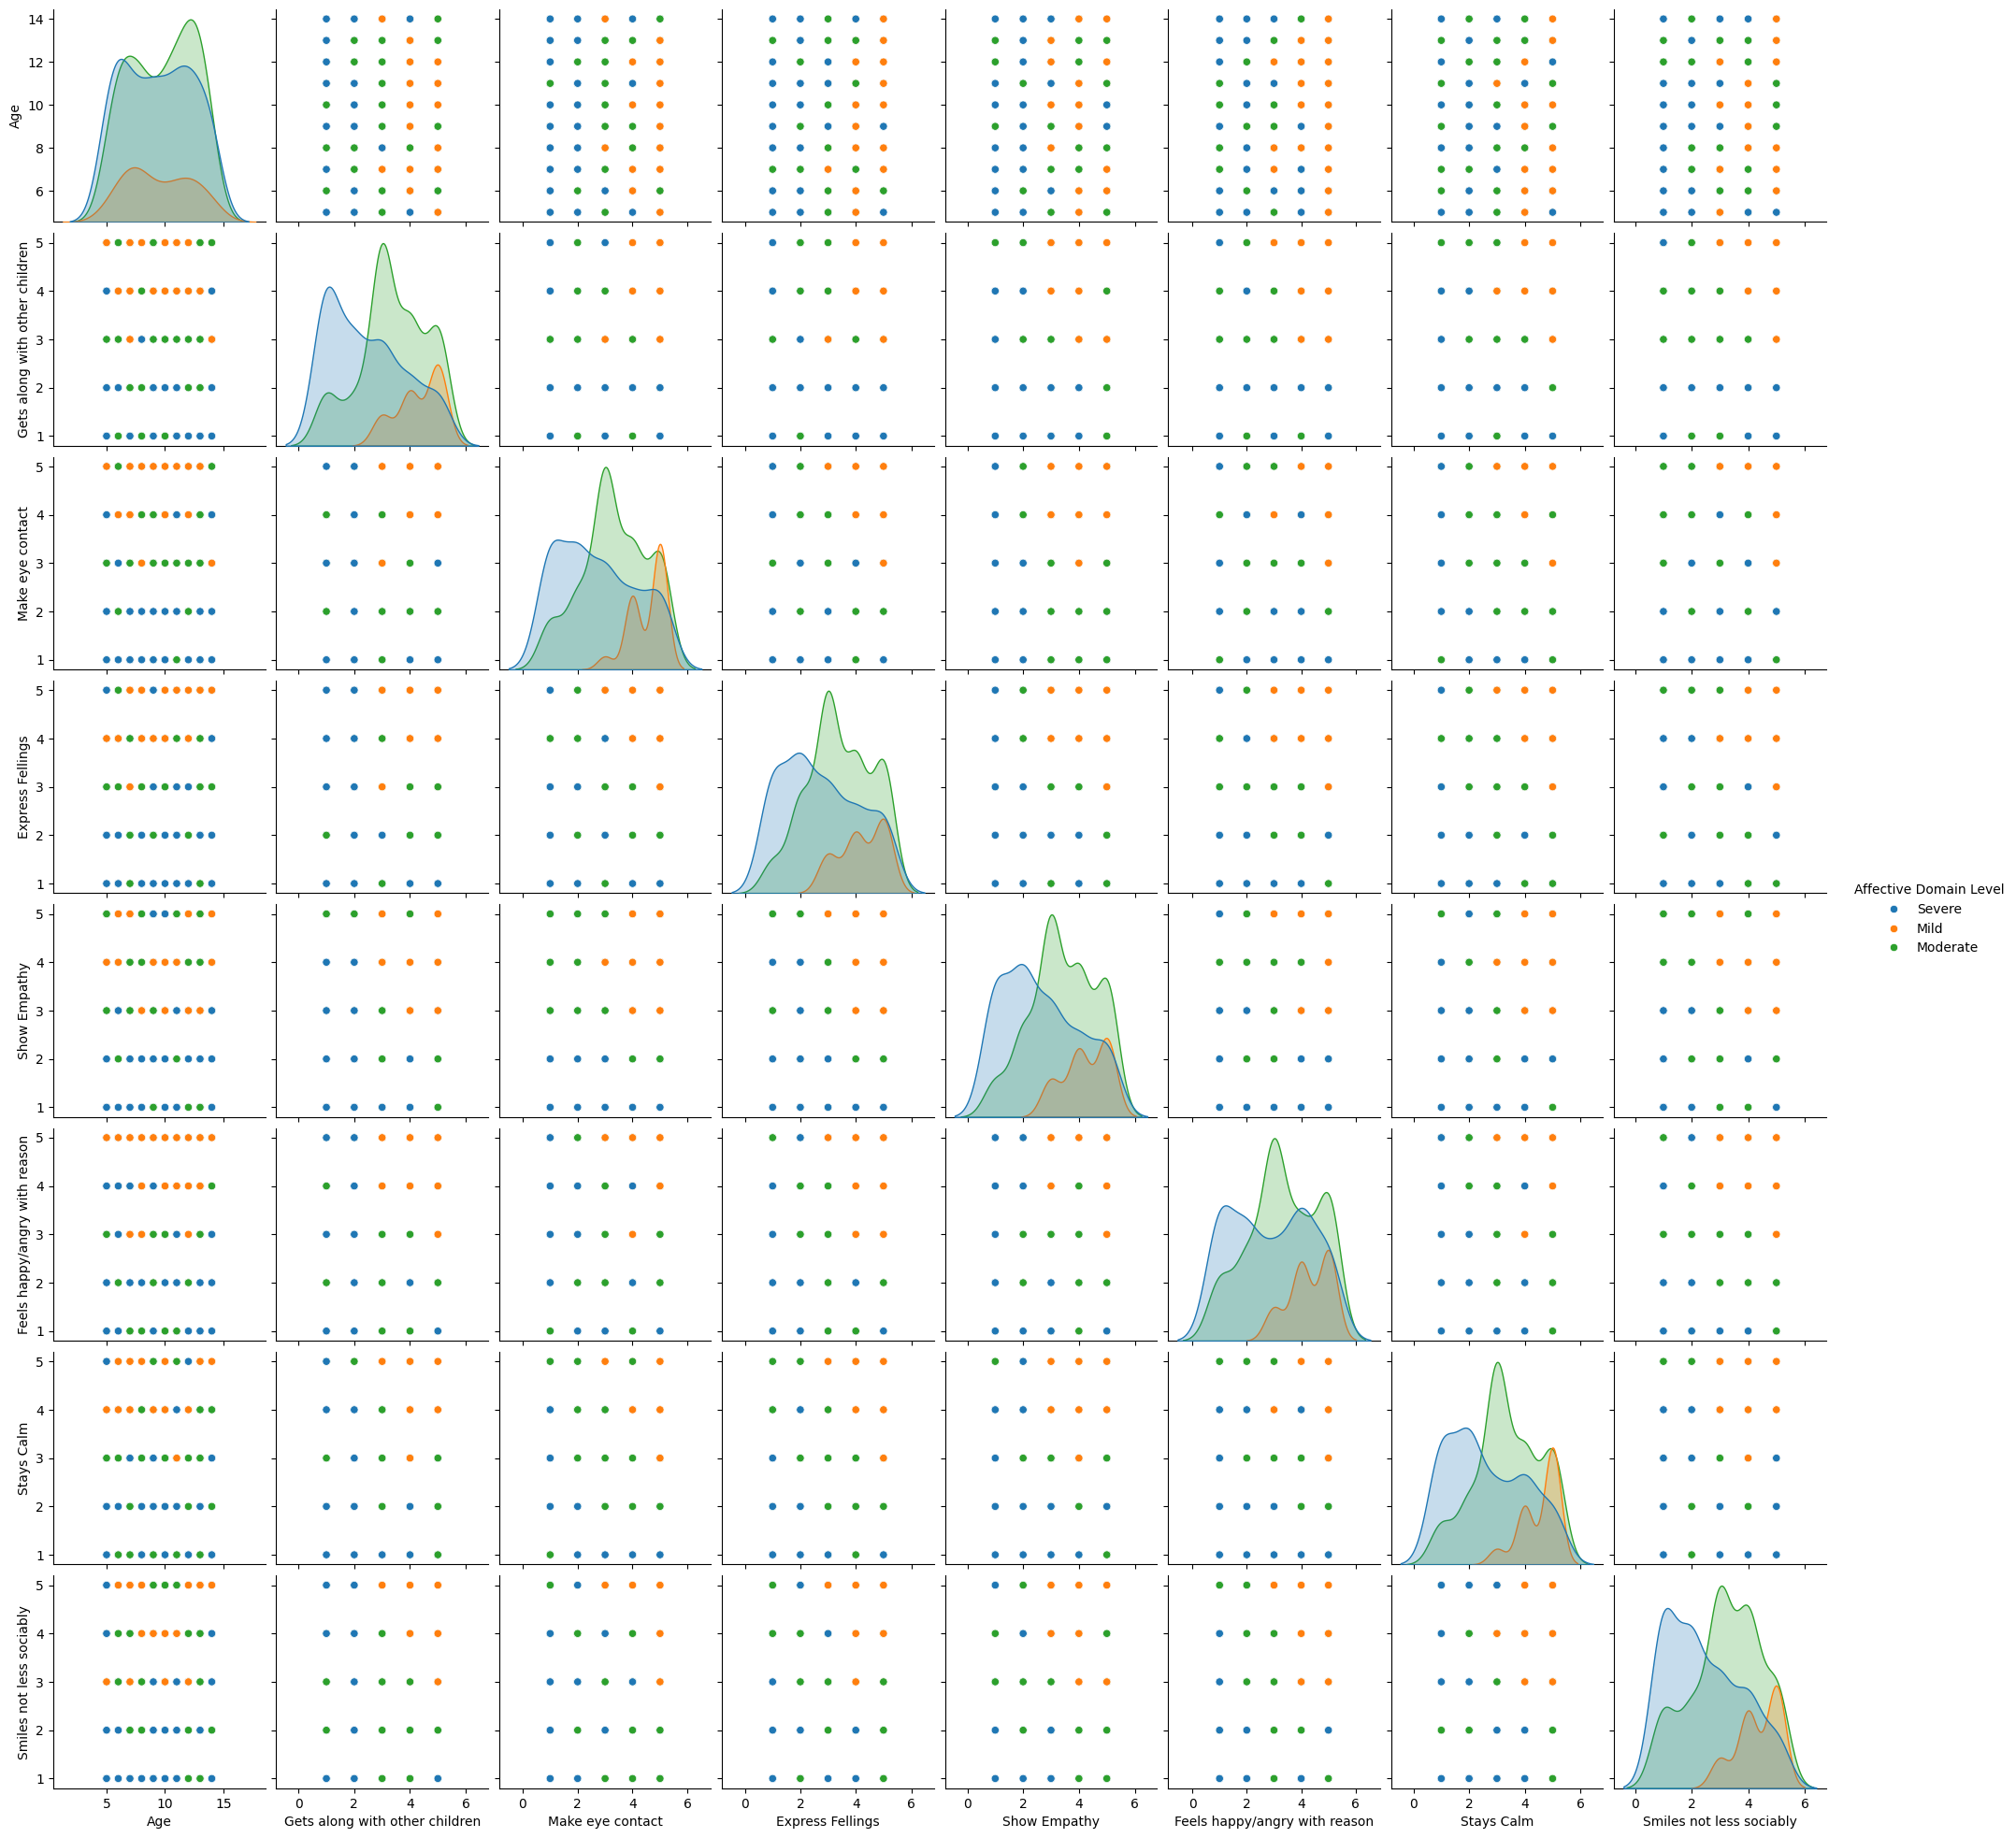

In [14]:
features_columns = ['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably']

columns_to_plot = features_columns + ['Affective Domain Level']

#create the pairplot
sns.pairplot(datasetAD[columns_to_plot], hue='Affective Domain Level', diag_kind='kde')
plt.show()

.

Affective Domain Level Distribution

Affective Domain Level
Moderate    183
Severe      175
Mild         49
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_27396\2229915803.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=affective_domain_counts.index, y=affective_domain_counts.values, palette='viridis')


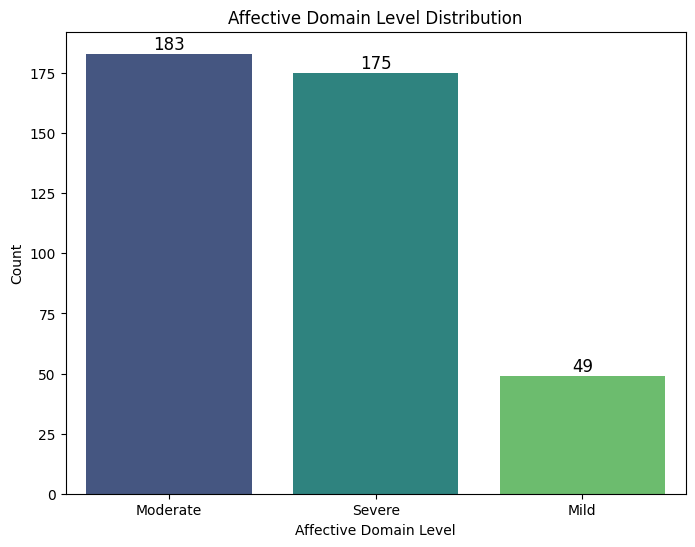

In [15]:
# Count the occurrences of each Affective Domain Level
affective_domain_counts = datasetAD['Affective Domain Level'].value_counts()

# Print the counts of each Affective Domain Level
print(affective_domain_counts)

# Plot a bar chart for Affective Domain Level distribution
plt.figure(figsize=(8, 6))

# Bar plot for Affective Domain Level distribution
sns.barplot(x=affective_domain_counts.index, y=affective_domain_counts.values, palette='viridis')

# Add text labels on top of the bars
for i in range(len(affective_domain_counts)):
    plt.text(i, affective_domain_counts.values[i] + 0.2, str(affective_domain_counts.values[i]), ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Affective Domain Level Distribution')
plt.xlabel('Affective Domain Level')
plt.ylabel('Count')
plt.show()


.

Age Distribution

<Figure size 1200x600 with 0 Axes>

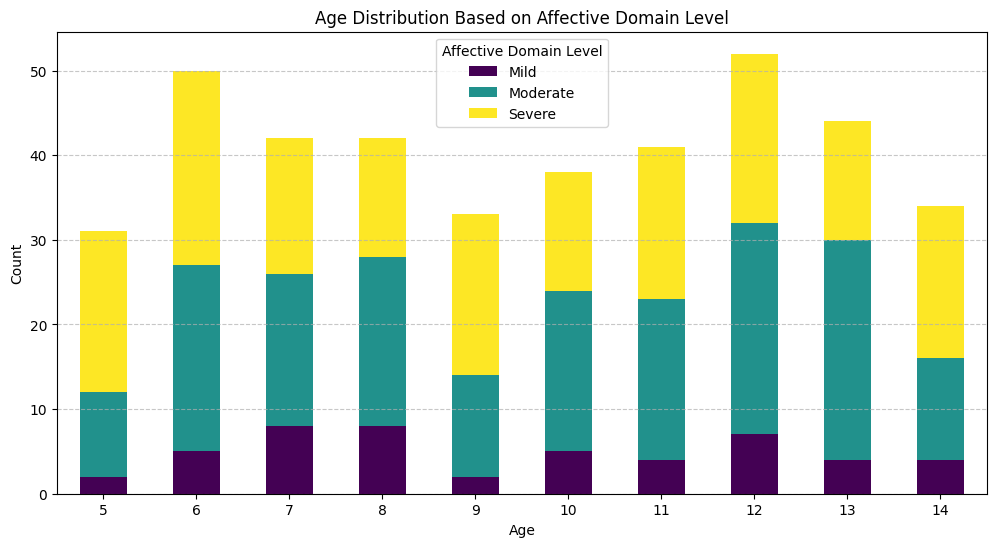

In [16]:
# Count occurrences of each age for each Affective Domain Level
age_counts_by_level = datasetAD.groupby(['Age', 'Affective Domain Level']).size().unstack(fill_value=0)

# Define the age range from min age to the max age present in the dataset
age_range = range(5, datasetAD['Age'].max() + 1)

# Reindex to include all ages from min to max, filling missing values with 0
age_counts_by_level = age_counts_by_level.reindex(age_range, fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
age_counts_by_level.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

# Title and labels
plt.title('Age Distribution Based on Affective Domain Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Affective Domain Level')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


.

Gender Distribution

<Figure size 1000x600 with 0 Axes>

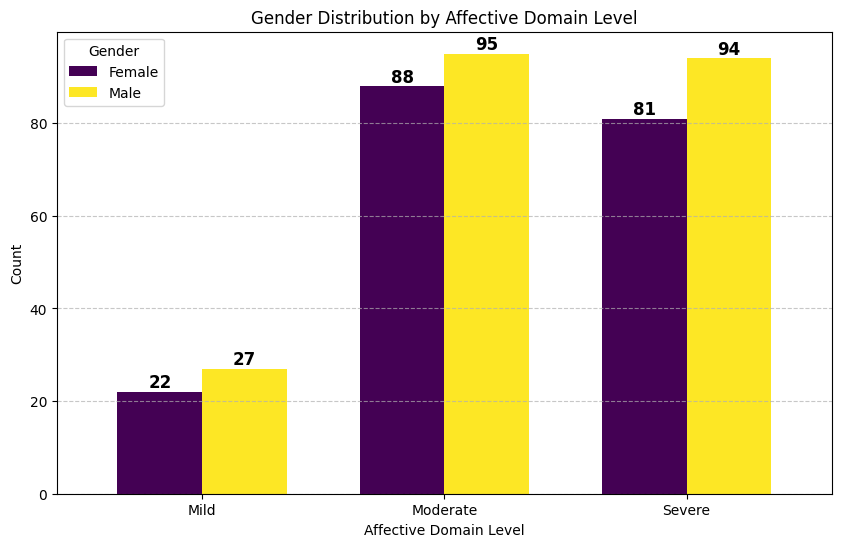

In [17]:
# Count occurrences of each gender within each Affective Domain Level
gender_counts_by_level = datasetAD.groupby(['Affective Domain Level', 'Gender']).size().unstack(fill_value=0)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot grouped bar chart
ax = gender_counts_by_level.plot(kind='bar', colormap='viridis', width=0.7, figsize=(10, 6))

# Add text labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and labels
plt.title('Gender Distribution by Affective Domain Level')
plt.xlabel('Affective Domain Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Gender')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


.

Family Member with or without Autism Distribution

<Figure size 1000x600 with 0 Axes>

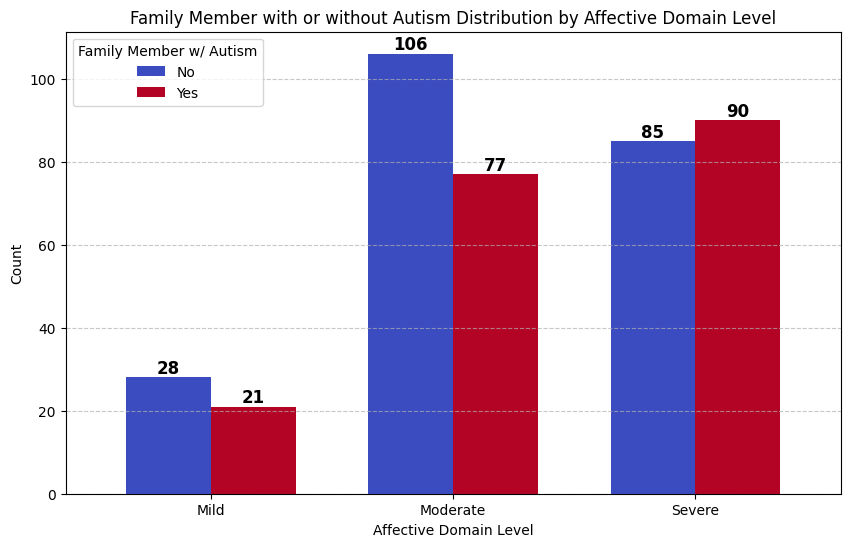

In [18]:
# Count occurrences of each gender within each Affective Domain Level
haveASD_counts_by_level = datasetAD.groupby(['Affective Domain Level', 'Family Member w/ Autism']).size().unstack(fill_value=0)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot grouped bar chart
ax = haveASD_counts_by_level.plot(kind='bar', colormap='coolwarm', width=0.7, figsize=(10, 6))

# Add text labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and labels
plt.title('Family Member with or without Autism Distribution by Affective Domain Level')
plt.xlabel('Affective Domain Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Family Member w/ Autism')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


.

.

# **Data Preprocessing**

In [19]:
#get colomn names
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [20]:
datasetAD.shape

(407, 11)

.

Handle Null Values

In [21]:
#check null values
datasetAD.isnull().sum().sort_values(ascending=False)

Show Empathy                      2
Stays Calm                        2
Make eye contact                  1
Family Member w/ Autism           0
Age                               0
Gender                            0
Gets along with other children    0
Express Fellings                  0
Feels happy/angry with reason     0
Smiles not less sociably          0
Affective Domain Level            0
dtype: int64

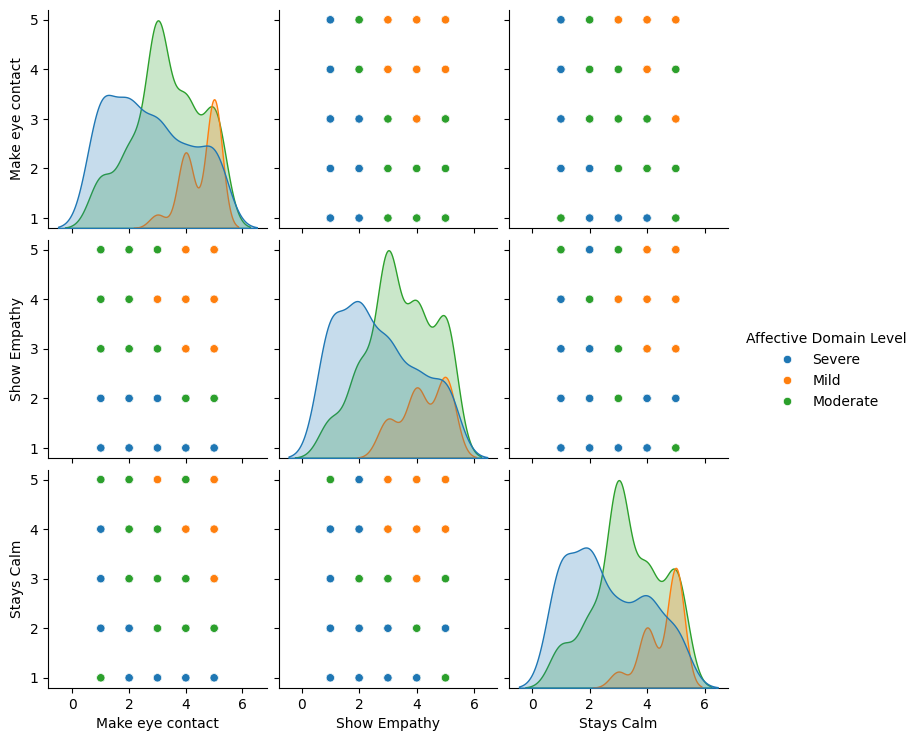

In [22]:
features_columns = ['Make eye contact', 'Show Empathy', 'Stays Calm']

columns_to_plot = features_columns + ['Affective Domain Level']

#create the pairplot
sns.pairplot(datasetAD[columns_to_plot], hue='Affective Domain Level', diag_kind='kde')
plt.show()

In [23]:
#fill null values
#columns with null values
columns_with_nulls = ['Show Empathy', 'Stays Calm', 'Make eye contact']

#fill missing values using median
for col in columns_with_nulls:
    datasetAD[col] = datasetAD.groupby('Affective Domain Level')[col].transform(lambda x: x.fillna(x.median()))

# Check if nulls are filled
print(datasetAD.isnull().sum())

Gender                            0
Age                               0
Family Member w/ Autism           0
Gets along with other children    0
Make eye contact                  0
Express Fellings                  0
Show Empathy                      0
Feels happy/angry with reason     0
Stays Calm                        0
Smiles not less sociably          0
Affective Domain Level            0
dtype: int64


In [24]:
datasetAD.head()

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,Female,14,Yes,3,3.0,4,2.0,3,2.0,2,Severe
1,Male,5,No,2,3.0,3,2.0,4,2.0,4,Severe
2,Female,12,No,5,4.0,5,5.0,4,3.0,5,Mild
3,Female,11,Yes,4,5.0,5,4.0,3,3.0,4,Moderate
4,Female,8,No,3,3.0,3,3.0,5,3.0,3,Moderate


In [25]:
print(datasetAD.dtypes)

Gender                             object
Age                                 int64
Family Member w/ Autism            object
Gets along with other children      int64
Make eye contact                  float64
Express Fellings                    int64
Show Empathy                      float64
Feels happy/angry with reason       int64
Stays Calm                        float64
Smiles not less sociably            int64
Affective Domain Level             object
dtype: object


.

Convert Intergers

In [26]:
float_columns = ['Show Empathy', 'Stays Calm', 'Make eye contact']

#convert float columns to integers
datasetAD[float_columns] = datasetAD[float_columns].astype(int)

print(datasetAD.dtypes)

Gender                            object
Age                                int64
Family Member w/ Autism           object
Gets along with other children     int64
Make eye contact                   int64
Express Fellings                   int64
Show Empathy                       int64
Feels happy/angry with reason      int64
Stays Calm                         int64
Smiles not less sociably           int64
Affective Domain Level            object
dtype: object


.

**Check Unique Values**

In [27]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [28]:
Gender = datasetAD.Gender.unique()
print(Gender)

['Female' 'Male']


In [29]:
Age = datasetAD.Age.unique()
print(Age)

[14  5 12 11  8 10  6 13  9  7]


In [30]:
Family_Member_Autism = datasetAD["Family Member w/ Autism"].unique()
print(Family_Member_Autism)

['Yes' 'No']


In [31]:
Gets_along_with_other_children = datasetAD["Gets along with other children"].unique()
print(Gets_along_with_other_children)

[3 2 5 4 1]


In [32]:
Make_eye_contact = datasetAD["Make eye contact"].unique()
print(Make_eye_contact)

[3 4 5 2 1]


In [33]:
Express_Fellings = datasetAD["Express Fellings"].unique()
print(Express_Fellings)

[4 3 5 2 1]


In [34]:
Show_Empathy = datasetAD["Show Empathy"].unique()
print(Show_Empathy)

[2 5 4 3 1]


In [35]:
Feels_happy_angry_with_reason = datasetAD["Feels happy/angry with reason"].unique()
print(Feels_happy_angry_with_reason)

[3 4 5 2 1]


In [36]:
Stays_Calm = datasetAD["Stays Calm"].unique()
print(Stays_Calm)

[2 3 1 4 5]


In [37]:
Smiles_not_less_sociably = datasetAD["Smiles not less sociably"].unique()
print(Smiles_not_less_sociably)

[2 4 5 3 1]


In [38]:
Affective_Domain_Level= datasetAD["Affective Domain Level"].unique()
print(Affective_Domain_Level)

['Severe' 'Mild' 'Moderate']


.

**Encoding**

In [39]:
datasetAD

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,Female,14,Yes,3,3,4,2,3,2,2,Severe
1,Male,5,No,2,3,3,2,4,2,4,Severe
2,Female,12,No,5,4,5,5,4,3,5,Mild
3,Female,11,Yes,4,5,5,4,3,3,4,Moderate
4,Female,8,No,3,3,3,3,5,3,3,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
402,Female,7,Yes,3,5,3,5,5,5,5,Mild
403,Male,12,No,4,5,4,3,5,4,5,Mild
404,Female,11,No,4,5,5,4,5,3,4,Mild
405,Male,14,Yes,3,3,5,4,5,5,5,Mild


In [40]:
datasetAD.shape

(407, 11)

In [41]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [42]:
categorical_cols = ['Gender', 'Family Member w/ Autism']

#one-hot encoded columns
encoded_features = pd.get_dummies(datasetAD[categorical_cols], columns=categorical_cols, prefix=['Gender', 'FamilyHistory'], drop_first=True)
datasetAD = datasetAD.drop(columns=categorical_cols)
datasetAD = pd.concat([datasetAD, encoded_features], axis=1)

#converted to integers
bool_columns = datasetAD.select_dtypes(include=['bool']).columns
datasetAD[bool_columns] = datasetAD[bool_columns].astype(int)

In [43]:
datasetAD

,Age,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level,Gender_Male,FamilyHistory_Yes
0,14,3,3,4,2,3,2,2,Severe,0,1
1,5,2,3,3,2,4,2,4,Severe,1,0
2,12,5,4,5,5,4,3,5,Mild,0,0
3,11,4,5,5,4,3,3,4,Moderate,0,1
4,8,3,3,3,3,5,3,3,Moderate,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402,7,3,5,3,5,5,5,5,Mild,0,1
403,12,4,5,4,3,5,4,5,Mild,1,0
404,11,4,5,5,4,5,3,4,Mild,0,0
405,14,3,3,5,4,5,5,5,Mild,1,1


In [44]:
datasetAD.shape

(407, 11)

.

In [45]:
#encode 'Affective Domain Level' attribute

ADLevel_mapping = {'Severe': 2, 'Moderate': 1, 'Mild':0}

datasetAD['Affective Domain Level'] = datasetAD['Affective Domain Level'].map(ADLevel_mapping)
print(datasetAD["Affective Domain Level"].unique())

[2 0 1]


In [46]:
datasetAD

,Age,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level,Gender_Male,FamilyHistory_Yes
0,14,3,3,4,2,3,2,2,2,0,1
1,5,2,3,3,2,4,2,4,2,1,0
2,12,5,4,5,5,4,3,5,0,0,0
3,11,4,5,5,4,3,3,4,1,0,1
4,8,3,3,3,3,5,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
402,7,3,5,3,5,5,5,5,0,0,1
403,12,4,5,4,3,5,4,5,0,1,0
404,11,4,5,5,4,5,3,4,0,0,0
405,14,3,3,5,4,5,5,5,0,1,1


In [47]:
datasetAD.shape

(407, 11)

Mild-0, Moderate-1, Severe-2

.

**Rearrange the order of the colomns**

In [48]:
reorder = ['Gender_Male', 'Age', 'FamilyHistory_Yes',
             'Gets along with other children', 'Make eye contact',
             'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
             'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level']

datasetAD = datasetAD[reorder]

In [49]:
datasetAD

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,0,14,1,3,3,4,2,3,2,2,2
1,1,5,0,2,3,3,2,4,2,4,2
2,0,12,0,5,4,5,5,4,3,5,0
3,0,11,1,4,5,5,4,3,3,4,1
4,0,8,0,3,3,3,3,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
402,0,7,1,3,5,3,5,5,5,5,0
403,1,12,0,4,5,4,3,5,4,5,0
404,0,11,0,4,5,5,4,5,3,4,0
405,1,14,1,3,3,5,4,5,5,5,0


.

In [50]:
datasetAD.describe()

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.530713,9.545455,0.461916,3.093366,3.206388,3.213759,3.184275,3.248157,3.181818,3.034398,1.309582
std,0.499670,2.833173,0.499161,1.379345,1.361562,1.313442,1.321646,1.368124,1.352379,1.360526,0.675016
min,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,10.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,1.000000,12.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000
max,1.000000,14.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [51]:
datasetAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender_Male                     407 non-null    int64
 1   Age                             407 non-null    int64
 2   FamilyHistory_Yes               407 non-null    int64
 3   Gets along with other children  407 non-null    int64
 4   Make eye contact                407 non-null    int64
 5   Express Fellings                407 non-null    int64
 6   Show Empathy                    407 non-null    int64
 7   Feels happy/angry with reason   407 non-null    int64
 8   Stays Calm                      407 non-null    int64
 9   Smiles not less sociably        407 non-null    int64
 10  Affective Domain Level          407 non-null    int64
dtypes: int64(11)
memory usage: 35.1 KB


.

**Find Correlation**

In [52]:
#find the correlation between attributes(X) and target variable(Y)
datasetAD.corr()

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
Gender_Male,1.000000,0.031634,0.031858,-0.036334,-0.023822,-0.079459,-0.051483,0.037464,0.020876,-0.034166,0.000951
Age,0.031634,1.000000,-0.049716,-0.042687,0.053112,0.072508,0.025714,0.008203,0.027408,0.034099,-0.034422
FamilyHistory_Yes,0.031858,-0.049716,1.000000,-0.023442,-0.086256,0.014326,-0.039739,0.120270,-0.011609,-0.139512,0.078938
Gets along with other children,-0.036334,-0.042687,-0.023442,1.000000,0.097256,0.090922,0.108084,0.058173,0.031809,0.175470,-0.454380
Make eye contact,-0.023822,0.053112,-0.086256,0.097256,1.000000,0.133658,0.114319,0.062350,0.177541,0.044025,-0.404682
Express Fellings,-0.079459,0.072508,0.014326,0.090922,0.133658,1.000000,0.127655,-0.002179,0.027985,0.093737,-0.366526
Show Empathy,-0.051483,0.025714,-0.039739,0.108084,0.114319,0.127655,1.000000,-0.025353,0.105232,0.185496,-0.400929
Feels happy/angry with reason,0.037464,0.008203,0.120270,0.058173,0.062350,-0.002179,-0.025353,1.000000,0.124651,0.065535,-0.310094
Stays Calm,0.020876,0.027408,-0.011609,0.031809,0.177541,0.027985,0.105232,0.124651,1.000000,0.114394,-0.444945
Smiles not less sociably,-0.034166,0.034099,-0.139512,0.175470,0.044025,0.093737,0.185496,0.065535,0.114394,1.000000,-0.438056


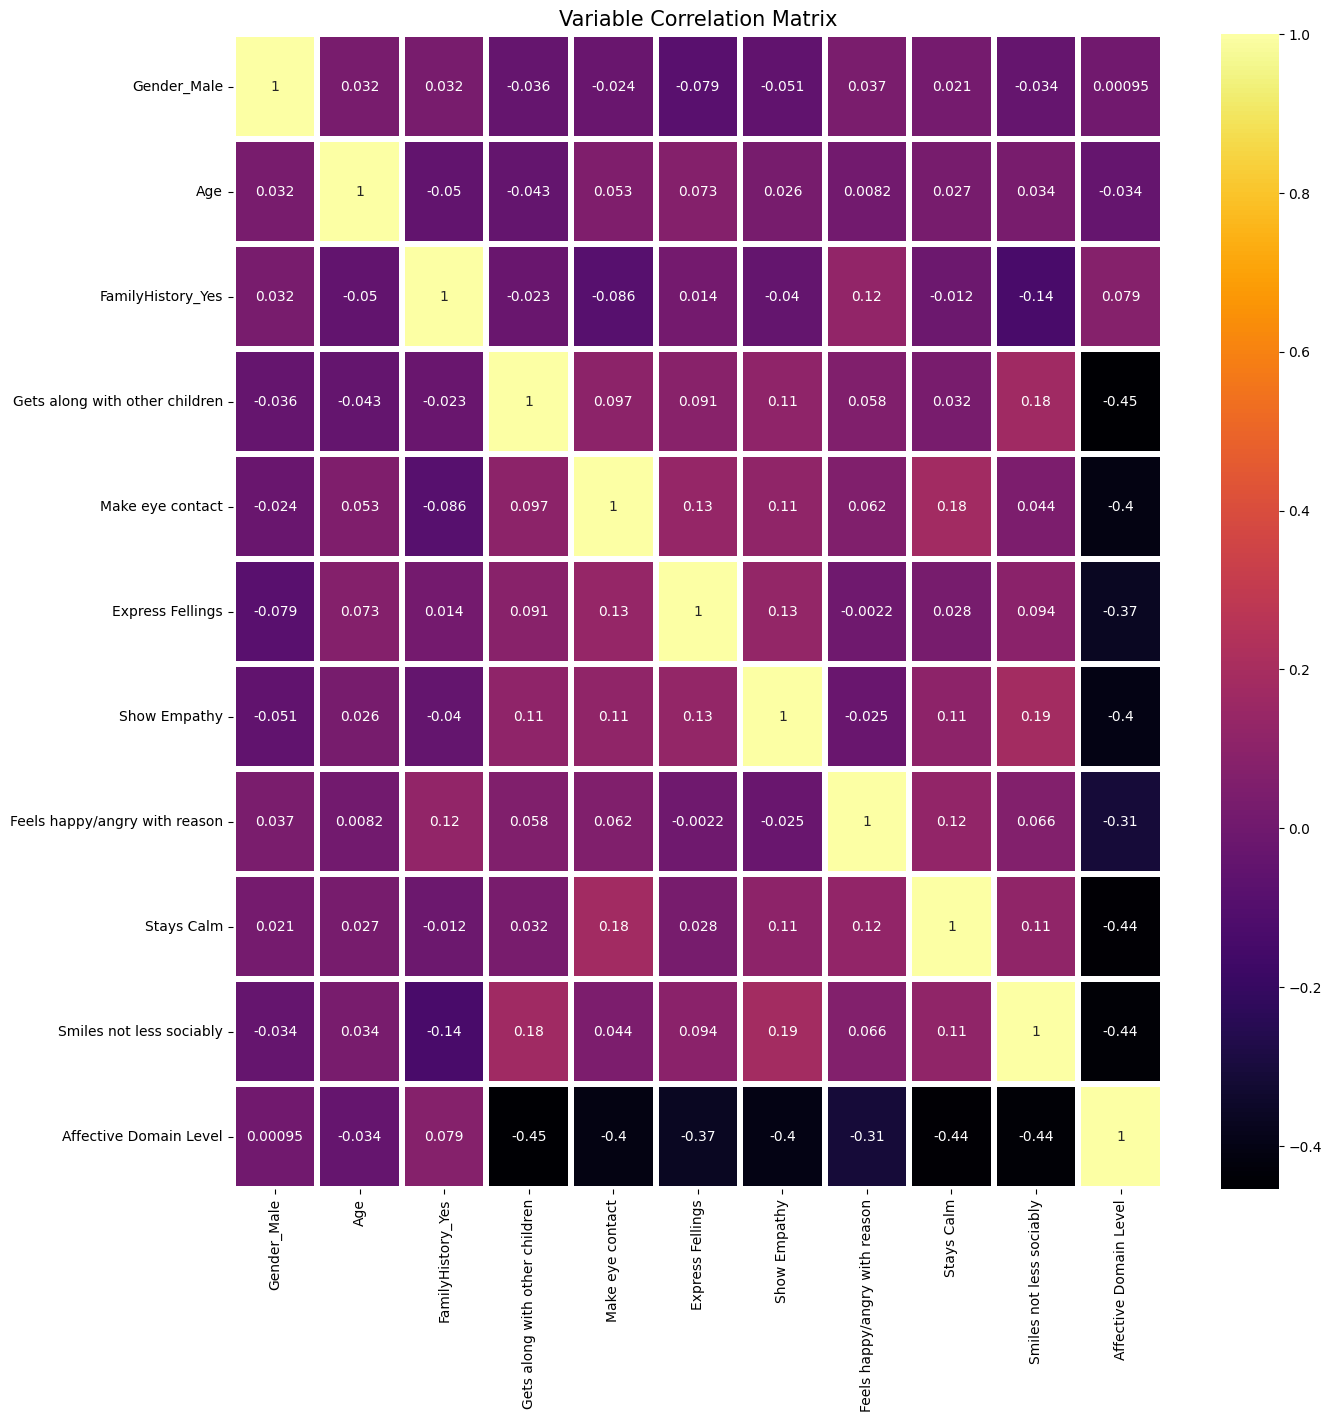

In [53]:
#format the plot
figAD, axAD = plt.subplots(figsize=(15, 15))

#create heatmap
sns.heatmap(datasetAD.corr(), ax=axAD, annot=True, linewidth=3, cmap="inferno")

#title
plt.title("Variable Correlation Matrix", size=15, y=1)

plt.show()

In [54]:
#sorting correlation values in decending order by Affective Domain Level
datasetAD.corr()["Affective Domain Level"].sort_values(ascending=False)

Affective Domain Level            1.000000
FamilyHistory_Yes                 0.078938
Gender_Male                       0.000951
Age                              -0.034422
Feels happy/angry with reason    -0.310094
Express Fellings                 -0.366526
Show Empathy                     -0.400929
Make eye contact                 -0.404682
Smiles not less sociably         -0.438056
Stays Calm                       -0.444945
Gets along with other children   -0.454380
Name: Affective Domain Level, dtype: float64

In [55]:
#remove the specified features
# datasetAD = datasetAD.drop(['Gender_Male'], axis=1)  # more closer to 0

# print(datasetAD.columns)

In [56]:
datasetAD.head()

,Gender_Male,Age,FamilyHistory_Yes,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,0,14,1,3,3,4,2,3,2,2,2
1,1,5,0,2,3,3,2,4,2,4,2
2,0,12,0,5,4,5,5,4,3,5,0
3,0,11,1,4,5,5,4,3,3,4,1
4,0,8,0,3,3,3,3,5,3,3,1


.

**Find Outliers**

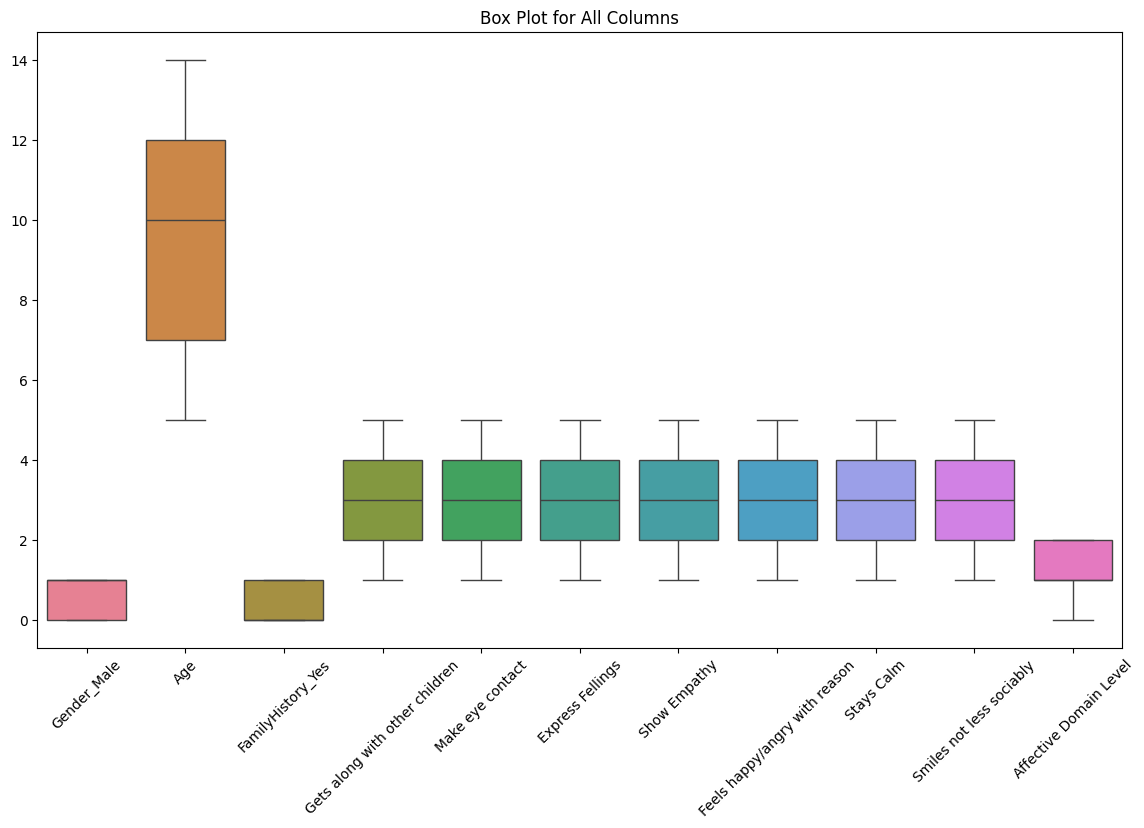

In [57]:
#create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=datasetAD)

plt.title('Box Plot for All Columns')
plt.xticks(rotation=45)
plt.show()

.

In [58]:
datasetAD.shape

(407, 11)

In [59]:
datasetAD.columns

Index(['Gender_Male', 'Age', 'FamilyHistory_Yes',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [60]:
datasetAD.rename(columns={"Gender_Male": "Gender", "FamilyHistory_Yes": "Family Member w/ Autism"}, inplace=True)



*   Male = 1 and Female = 0 [Gender]
*   Yes = 1 and No = 0 [FamilyHistory]



In [61]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [62]:
datasetAD

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
0,0,14,1,3,3,4,2,3,2,2,2
1,1,5,0,2,3,3,2,4,2,4,2
2,0,12,0,5,4,5,5,4,3,5,0
3,0,11,1,4,5,5,4,3,3,4,1
4,0,8,0,3,3,3,3,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
402,0,7,1,3,5,3,5,5,5,5,0
403,1,12,0,4,5,4,3,5,4,5,0
404,0,11,0,4,5,5,4,5,3,4,0
405,1,14,1,3,3,5,4,5,5,5,0


In [63]:
datasetAD.shape

(407, 11)

In [64]:
datasetAD.describe()

,Gender,Age,Family Member w/ Autism,Gets along with other children,Make eye contact,Express Fellings,Show Empathy,Feels happy/angry with reason,Stays Calm,Smiles not less sociably,Affective Domain Level
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.530713,9.545455,0.461916,3.093366,3.206388,3.213759,3.184275,3.248157,3.181818,3.034398,1.309582
std,0.499670,2.833173,0.499161,1.379345,1.361562,1.313442,1.321646,1.368124,1.352379,1.360526,0.675016
min,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,1.000000,10.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,1.000000,12.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000
max,1.000000,14.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000


In [65]:
datasetAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          407 non-null    int64
 1   Age                             407 non-null    int64
 2   Family Member w/ Autism         407 non-null    int64
 3   Gets along with other children  407 non-null    int64
 4   Make eye contact                407 non-null    int64
 5   Express Fellings                407 non-null    int64
 6   Show Empathy                    407 non-null    int64
 7   Feels happy/angry with reason   407 non-null    int64
 8   Stays Calm                      407 non-null    int64
 9   Smiles not less sociably        407 non-null    int64
 10  Affective Domain Level          407 non-null    int64
dtypes: int64(11)
memory usage: 35.1 KB


.

In [66]:
#count of the each Affective Domain level
AD_level_counts = datasetAD['Affective Domain Level'].value_counts()
print(AD_level_counts)

Affective Domain Level
1    183
2    175
0     49
Name: count, dtype: int64


*   Moderate - 148
*   Mild - 49
*   Severe - 210

.

.

# **Split DataSet**

In [67]:
#assuming X and y are features and target variable
X = datasetAD.iloc[:,:-1].values
y = datasetAD.iloc[:,-1].values

In [68]:
data_size = len(X)

In [69]:
#calculate split indices
train_size = int(0.7 * data_size)
val_size = int(0.15 * data_size)
test_size = data_size - train_size - val_size

In [70]:
#split the data
X_train = X[:train_size]
y_train = y[:train_size]

In [71]:
X_val = X[train_size : train_size + val_size]
y_val = y[train_size : train_size + val_size]

In [72]:
X_test = X[train_size + val_size :]
y_test = y[train_size + val_size :]

In [73]:
#display sizes for neural network
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 284
Validation size: 61
Test size: 62


.

# **Training Dataset Balanced [Using SMOTE]**

In [74]:
smote = SMOTE(random_state=42)  # You can change the random_state for different results

# Apply SMOTE to the training data
X_train_balanced_df, y_train_balanced_df = smote.fit_resample(X_train, y_train)

In [75]:
import pandas as pd

print("Original class distribution:\n", pd.Series(y_train).value_counts())
print("\nClass distribution after SMOTE:\n", pd.Series(y_train_balanced_df).value_counts())

Original class distribution:
 2    136
1    131
0     17
Name: count, dtype: int64

Class distribution after SMOTE:
 2    136
0    136
1    136
Name: count, dtype: int64


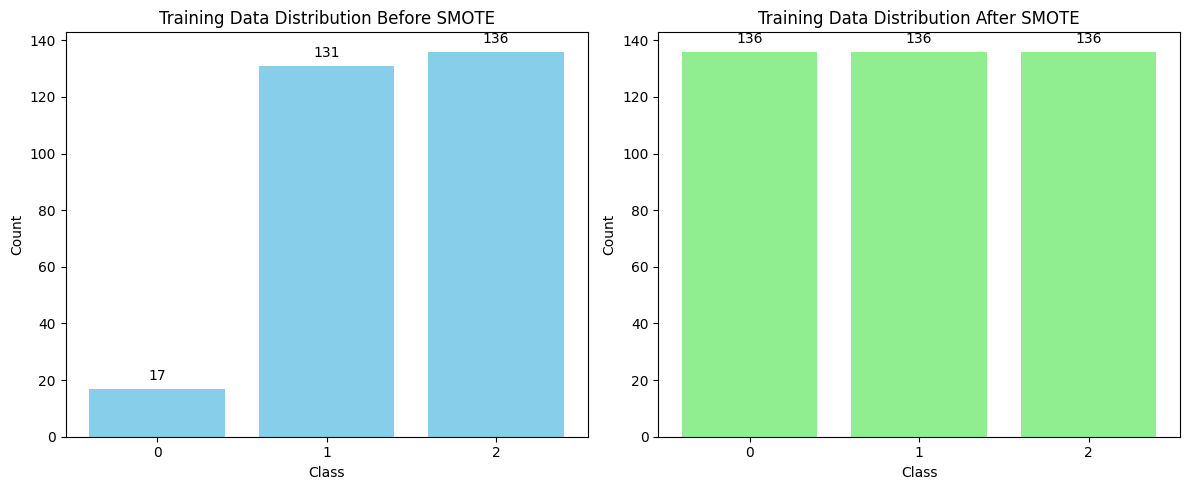

In [76]:
# Count class distribution
original_counts = pd.Series(y_train).value_counts().sort_index()
smote_counts = pd.Series(y_train_balanced_df).value_counts().sort_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart: Before SMOTE
bars1 = axes[0].bar(original_counts.index.astype(str), original_counts.values, color='skyblue')
axes[0].set_title('Training Data Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 2, str(height), 
                 ha='center', va='bottom', fontsize=10)

# Bar chart: After SMOTE
bars2 = axes[1].bar(smote_counts.index.astype(str), smote_counts.values, color='lightgreen')
axes[1].set_title('Training Data Distribution After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 2, str(height), 
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

.

In [77]:
 ********************* END OF THE EXECUTION ******************************************

SyntaxError: invalid syntax (179921148.py, line 1)

.

# **Model Training**

In [78]:
X_trainB = X_train_balanced_df
y_trainB = y_train_balanced_df

Normalization

In [79]:
#initialize the scaler
scaler = StandardScaler()

In [80]:
#fit the scaler
X_trainB_scaled = scaler.fit_transform(X_trainB)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

.

# **Random Forest**

In [ ]:
#initialize random forest classifier
modelrf = RandomForestClassifier(random_state=42)

In [ ]:
#fit the model
modelrf.fit(X_trainB, y_trainB)

RandomForestClassifier(random_state=42)

In [ ]:
#predictions on training, validaion and test sets
y_train_pred_rfB = modelrf.predict(X_trainB)
y_val_pred_rfB = modelrf.predict(X_val)
y_test_pred_rfB = modelrf.predict(X_test)

In [ ]:
#mean squard error(MSE)
train_mse_rfB = mean_squared_error(y_trainB, y_train_pred_rfB)
val_mse_rfB = mean_squared_error(y_val, y_val_pred_rfB)
test_mse_rfB = mean_squared_error(y_test, y_test_pred_rfB)

In [ ]:
print(f"Training Mean Squard Error(MSE) -  Random Forest: {train_mse_rfB}")
print(f"Validation Mean Squard Error(MSE) -  Random Forest: {val_mse_rfB}")
print(f"Test Mean Squard Error(MSE) -  Random Forest: {test_mse_rfB}")

Training Mean Squard Error(MSE) -  Random Forest: 0.1005369542372785
Validation Mean Squard Error(MSE) -  Random Forest: 0.21311475409836064
Test Mean Squard Error(MSE) -  Random Forest: 0.11290322580645161


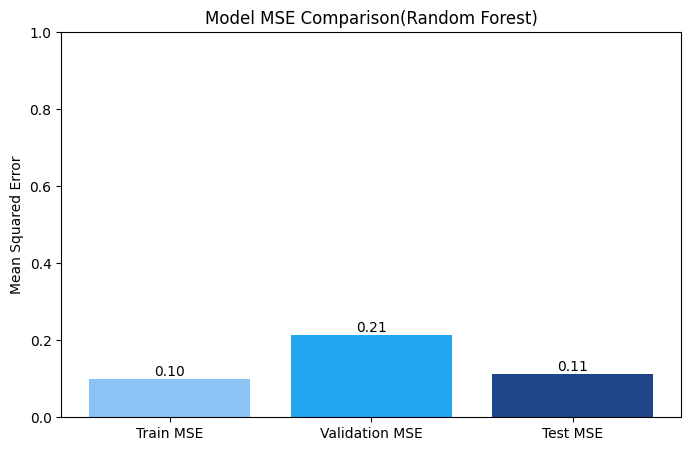

In [ ]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    ["Train MSE", "Validation MSE", "Test MSE"],
    [train_mse_rfB, val_mse_rfB, test_mse_rfB],
    color=["#89C4F4", "#22A7F0", "#1F4788"],
)

#add value counts
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.ylim(0, 1)
plt.ylabel("Mean Squared Error")
plt.title("Model MSE Comparison(Random Forest)")
plt.show()

In [ ]:
train_accuracy_rfB = 1 - train_mse_rfB
val_accuracy_rfB = 1 - val_mse_rfB
test_accuracy_rfB = 1 - test_mse_rfB

In [ ]:
print(f"Training Accuracy -  Random Forest: {train_accuracy_rfB}")
print(f"Validation Accuracy -  Random Forest: {val_accuracy_rfB}")
print(f"Test Accuracy -  Random Forest: {test_accuracy_rfB}")

Training Accuracy -  Random Forest: 0.8994630457627215
Validation Accuracy -  Random Forest: 0.7868852459016393
Test Accuracy -  Random Forest: 0.8870967741935484


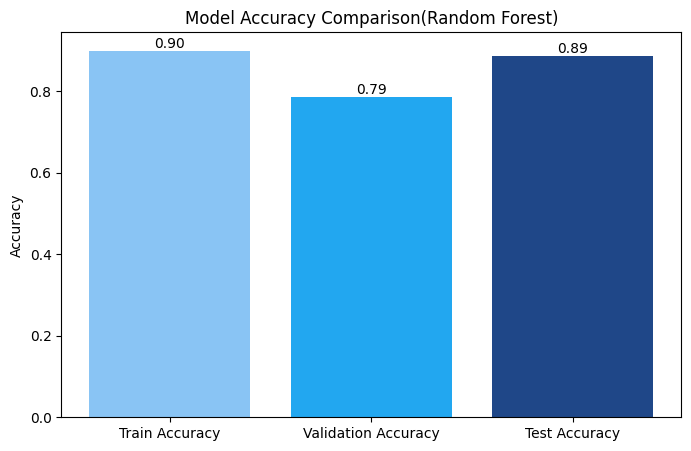

In [ ]:
plt.figure(figsize=(8, 5))

bars = plt.bar(
    ["Train Accuracy", "Validation Accuracy", "Test Accuracy"],
    [train_accuracy_rfB, val_accuracy_rfB, test_accuracy_rfB],
    color=["#89C4F4", "#22A7F0", "#1F4788"],
)

#add value counts
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison(Random Forest)")
plt.show()


Classification Reports

In [ ]:
print("Classification Report for Training Set(Random Forest):")
print(classification_report(y_trainB, y_train_pred_rfB))

print("Classification Report for Validation Set(Random Forest):")
print(classification_report(y_val, y_val_pred_rfB))

print("Classification Report for Test Set(Random Forest):")
print(classification_report(y_test, y_test_pred_rfB))

Classification Report for Training Set(Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       136
           1       0.84      0.86      0.85       136
           2       0.90      0.84      0.87       136

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408

Classification Report for Validation Set(Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.79      0.76      0.77        29
           2       0.75      0.78      0.77        23

    accuracy                           0.79        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.79      0.79      0.79        61

Classification Report for Test Set(Random Forest):
              precision    recall  f1-score   support

           0       0

Confusion Matrix

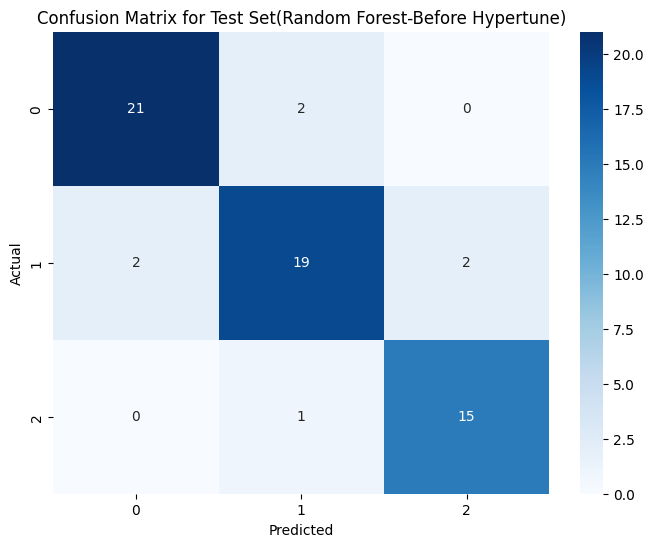

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_rfB)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set(Random Forest-Before Hypertune)')
plt.show()

**After Hypertune**

In [ ]:
#use GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 5],
    "max_features": ['auto', 'sqrt', 'log2'],
    "bootstrap": [True, False],
    "class_weight": ['balanced', None],
}

#instantiate RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', return_train_score=True)

In [ ]:
#fit GridSearchCV on the training set
grid_search.fit(X_trainB, y_trainB)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1635 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
#best hyperparameters
best_params = grid_search.best_params_
print("Random Forest Best Parameters:", best_params)

Random Forest Best Parameters: {'bootstrap': False, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
#train the best model
best_rf_model = grid_search.best_estimator_

In [ ]:
# #evaluate
# y_train_pred_rfA = best_rf_model.predict(X_trainB)
# y_val_pred_rfA = best_rf_model.predict(X_val)
# y_test_pred_rfA = best_rf_model.predict(X_test)

Mean Squard Error(MSE)

In [ ]:
#predictions on training, validaion and test sets
y_train_predBest_rfA = modelrf.predict(X_trainB)
y_val_predBest_rfA = modelrf.predict(X_val)
y_test_predBest_rfA = modelrf.predict(X_test)

In [ ]:
#mean squard error(MSE)
train_mse_rfA = mean_squared_error(y_trainB, y_train_predBest_rfA)
val_mse_rfA = mean_squared_error(y_val, y_val_predBest_rfA)
test_mse_rfA = mean_squared_error(y_test, y_test_predBest_rfA)

print(f"Hypertuning Training Mean Squard Error(MSE) of Random Forest: {train_mse_rfA}")
print(f"Hypertuning Validation Mean Squard Error(MSE) of Random Forest: {val_mse_rfA}")
print(f"Hypertuning Test Mean Squard Error(MSE) of Random Forest: {test_mse_rfA}")

Hypertuning Training Mean Squard Error(MSE) of Random Forest: 0.1003453286823973
Hypertuning Validation Mean Squard Error(MSE) of Random Forest: 0.20783606411475408
Hypertuning Test Mean Squard Error(MSE) of Random Forest: 0.109864516132252


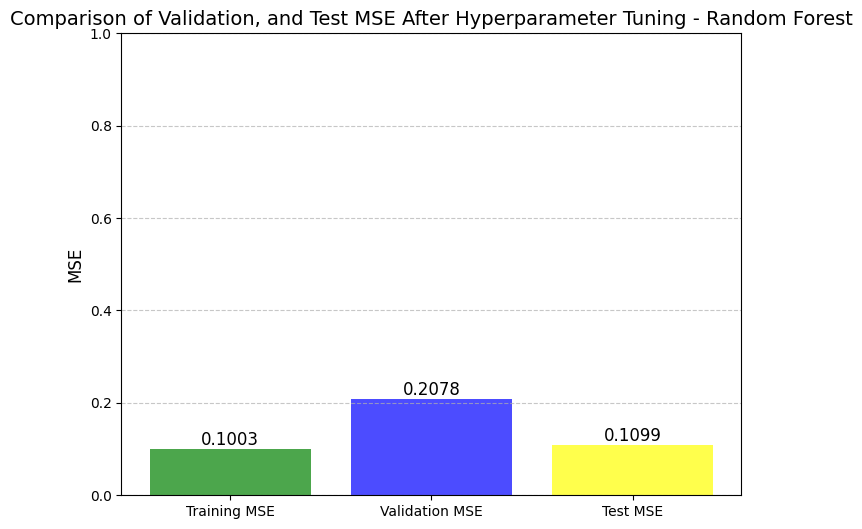

In [ ]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [train_mse_rfA, val_mse_rfA, test_mse_rfA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test MSE After Hyperparameter Tuning - Random Forest", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Accuracy

In [ ]:
train_accuracy_rfA  = 1 - train_mse_rfA
val_accuracy_rfA = 1 - val_mse_rfA
test_accuracy_rfA = 1 - test_mse_rfA

print(f"Hypertuning Training Accuracy of Random Forest: {train_accuracy_rfA}")
print(f"Hypertuning Validation Accuracy of Random Forest: {val_accuracy_rfA}")
print(f"Hypertuning Test Accuracy of Random Forest: {test_accuracy_rfA}")

Hypertuning Training Accuracy of Random Forest: 0.8996546713176027
Hypertuning Validation Accuracy of Random Forest: 0.7921639358852459
Hypertuning Test Accuracy of Random Forest: 0.890135483867748


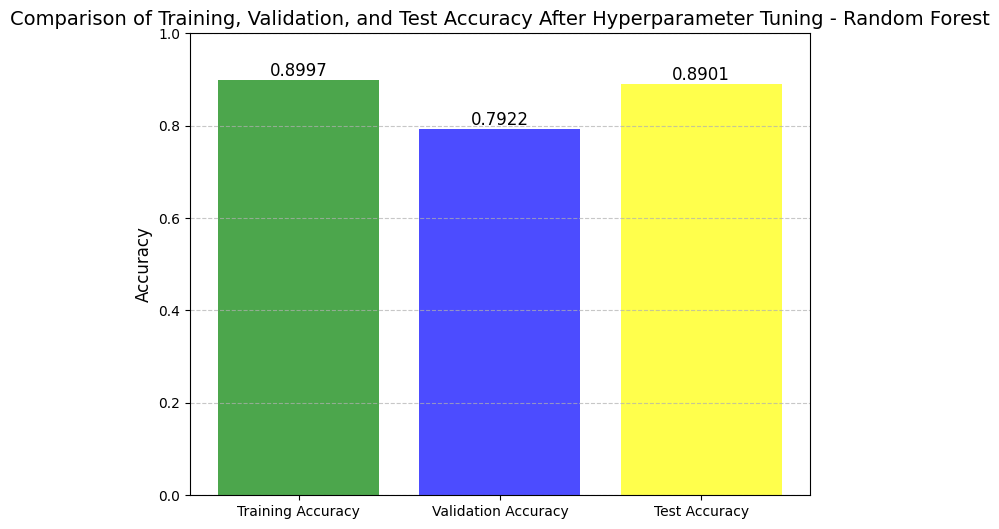

In [ ]:
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [train_accuracy_rfA, val_accuracy_rfA, test_accuracy_rfA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Training, Validation, and Test Accuracy After Hyperparameter Tuning - Random Forest", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confusion Matrix

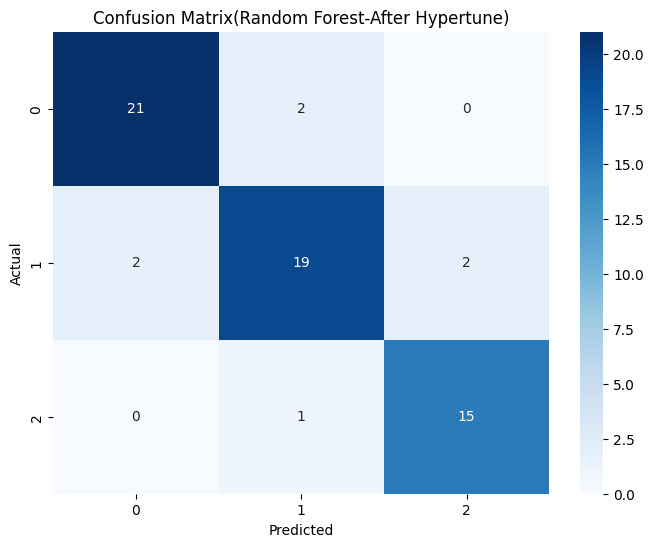

In [ ]:
cm = confusion_matrix(y_test, y_test_predBest_rfA)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Random Forest-After Hypertune)')
plt.show()

Clasification Reports

In [ ]:
#for the train set
train_classification_report = classification_report(y_trainB, y_train_predBest_rfA)

#for the validation set
val_classification_report = classification_report(y_val, y_val_predBest_rfA)

#for the test set
test_classification_report = classification_report(y_test, y_test_predBest_rfA)

#print the classification reports
print("Hypertuning Training Classification Report(Random Forest):\n", train_classification_report)
print("Hypertuning Validation Classification Report(Random Forest):\n", val_classification_report)
print("\nHypertuning Test Classification Report(Random Forest):\n", test_classification_report)

Hypertuning Training Classification Report(Random Forest):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       136
           1       0.84      0.86      0.85       136
           2       0.90      0.84      0.87       136

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408

Hypertuning Validation Classification Report(Random Forest):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.79      0.76      0.77        29
           2       0.75      0.78      0.77        23

    accuracy                           0.79        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.79      0.79      0.79        61


Hypertuning Test Classification Report(Random Forest):
               precision    recall  f1-score   support

    

In [ ]:
# Create a pickle file for the Random Forest model
rf_AD_model_pickle = open('rf_ADmodel.pkl', 'wb')
pickle.dump(best_rf_model, rf_AD_model_pickle)
rf_AD_model_pickle.close()

.

.

# **K-Nearest Neighbors (KNN)**

In [ ]:
#train the initial KNN model
knn = KNeighborsClassifier()
knn.fit(X_trainB_scaled, y_trainB)

KNeighborsClassifier()

In [ ]:
#predict on train, validation, and test sets
y_train_pred_knnB = knn.predict(X_trainB_scaled)
y_val_pred_knnB = knn.predict(X_val_scaled)
y_test_pred_knnB = knn.predict(X_test_scaled)

In [ ]:
#classification report
print("\nClassification Report for Training Set(KNN - Before Hypertune):")
print(classification_report(y_trainB, y_train_pred_knnB))

print("\nClassification Report for Validation Set(KNN - Before Hypertune):")
print(classification_report(y_val, y_val_pred_knnB))

print("\nClassification Report for Test Set(KNN - Before Hypertune):")
print(classification_report(y_test, y_test_pred_knnB))


Classification Report for Training Set(KNN - Before Hypertune):
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       136
           1       0.84      0.76      0.80       136
           2       0.93      0.85      0.89       136

    accuracy                           0.87       408
   macro avg       0.87      0.87      0.87       408
weighted avg       0.87      0.87      0.87       408


Classification Report for Validation Set(KNN - Before Hypertune):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       0.65      0.69      0.67        29
           2       0.80      0.52      0.63        23

    accuracy                           0.67        61
   macro avg       0.68      0.74      0.68        61
weighted avg       0.70      0.67      0.67        61


Classification Report for Test Set(KNN - Before Hypertune):
              precision    recall  f1-score  

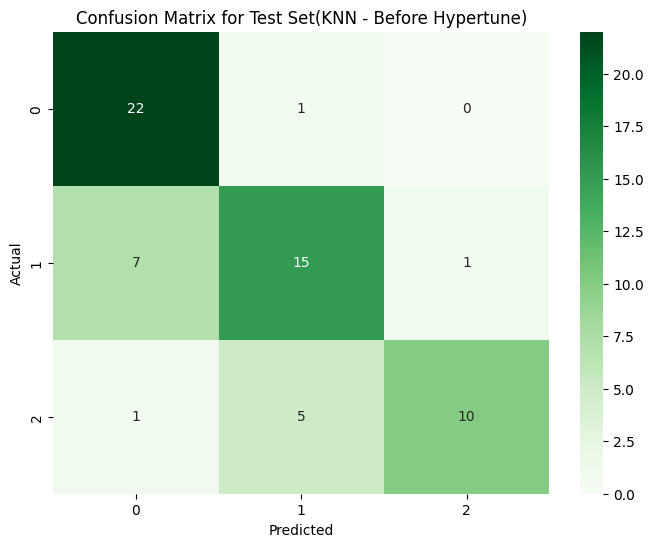

In [ ]:
#confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred_knnB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(KNN - Before Hypertune)")
plt.show()

Mean Squard Error(MSE)

In [ ]:
train_mse_knnB = mean_squared_error(y_trainB, y_train_pred_knnB)
val_mse_knnB = mean_squared_error(y_val, y_val_pred_knnB)
test_mse_knnB = mean_squared_error(y_test, y_test_pred_knnB)

In [ ]:
print(f"KNN Training Mean Squard Error(MSE) - Before Hypertuning: {train_mse_knnB}")
print(f"KNN Validation Mean Squard Error(MSE) - Before Hypertuning: {val_mse_knnB}")
print(f"KNN Test Mean Squard Error(MSE) - Before Hypertuning: {test_mse_knnB}")

KNN Training Mean Squard Error(MSE) - Before Hypertuning: 0.13725490196078433
KNN Validation Mean Squard Error(MSE) - Before Hypertuning: 0.32786885245901637
KNN Test Mean Squard Error(MSE) - Before Hypertuning: 0.2903225806451613


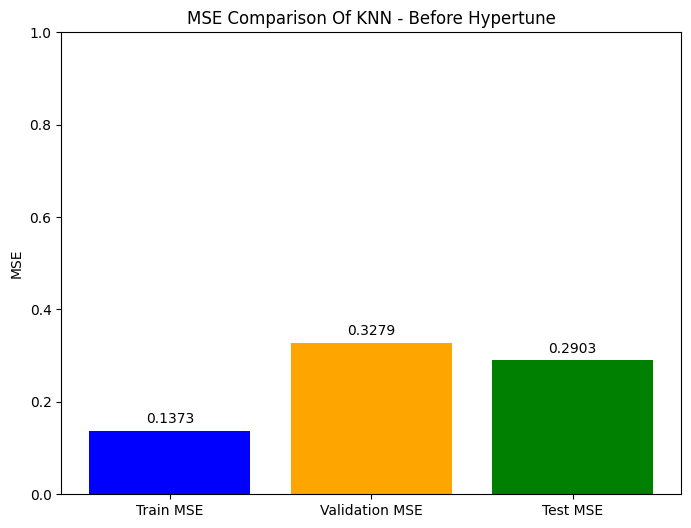

In [ ]:
#plot MSE
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_knnB, val_mse_knnB, test_mse_knnB], color=["blue", "orange", "green"])
plt.title("MSE Comparison Of KNN - Before Hypertune")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
train_acc_knnB = 1 - train_mse_knnB
val_acc_knnB = 1 - val_mse_knnB
test_acc_knnB = 1 - test_mse_knnB

In [ ]:
print(f"KNN Training Accuracy: {train_acc_knnB}")
print(f"KNN Validation Accuracy: {val_acc_knnB}")
print(f"KNN Test Accuracy: {test_acc_knnB}")

KNN Training Accuracy: 0.8627450980392157
KNN Validation Accuracy: 0.6721311475409837
KNN Test Accuracy: 0.7096774193548387


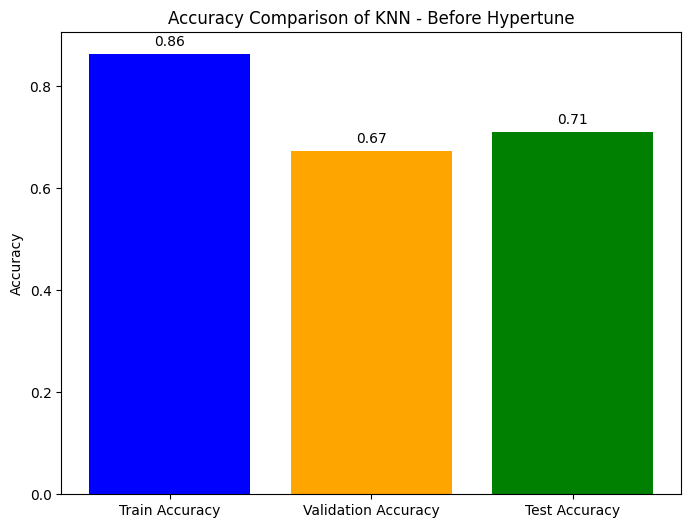

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_knnB, val_acc_knnB, test_acc_knnB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison of KNN - Before Hypertune")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

**After Hypertune**

In [ ]:
#reinitialize and scale the data
X_trainB_scaled = scaler.fit_transform(X_trainB)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#initialize KNN
knn = KNeighborsClassifier()

#GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

#fit GridSearchCV
grid_search_knn.fit(X_trainB_scaled, y_trainB)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
#best parameters and model
if hasattr(grid_search_knn, 'best_params_'):
    best_params_knn = grid_search_knn.best_params_
    print("Best Hyperparameters for KNN:", best_params_knn)
else:
    print("GridSearchCV did not complete successfully.")

Best Hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
best_knn_model = grid_search_knn.best_estimator_

In [ ]:
#evaluate the tuned model
y_trainpred_best_knnA = best_knn_model.predict(X_trainB_scaled)
y_TValpred_best_knnA = best_knn_model.predict(X_val_scaled)
y_Testpred_best_knnA = best_knn_model.predict(X_test_scaled)

**Mean Squard Error(MSE)**

In [ ]:
trainmse_knnA = mean_squared_error(y_trainB, y_trainpred_best_knnA)
valmse_knnA = mean_squared_error(y_val, y_TValpred_best_knnA)
testmse_knnA = mean_squared_error(y_test, y_Testpred_best_knnA)

print("Hypertuning KNN Mean Squared Error (MSE) of Training:", trainmse_knnA)
print("Hypertuning KNN Mean Squared Error (MSE) of Validation:", valmse_knnA)
print("Hypertuning KNN Mean Squared Error (MSE) of Testing:", testmse_knnA)

Hypertuning KNN Mean Squared Error (MSE) of Training: 0.13589499923572784
Hypertuning KNN Mean Squared Error (MSE) of Validation: 0.3114754098360656
Hypertuning KNN Mean Squared Error (MSE) of Testing: 0.22580645161290322


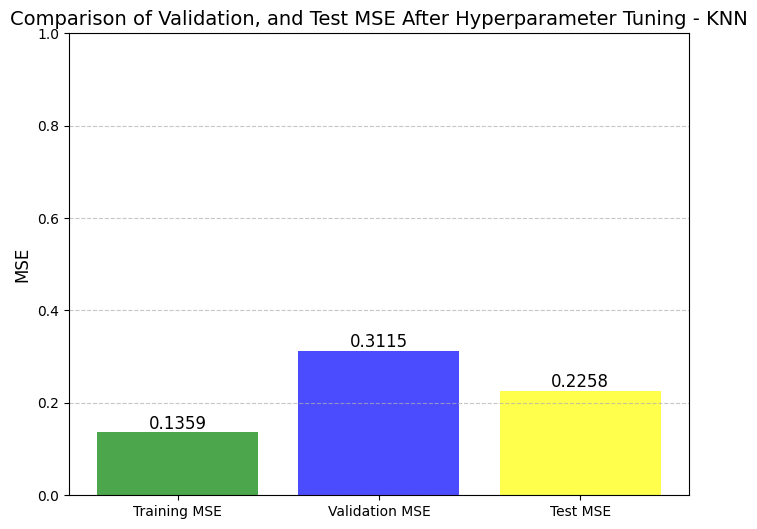

In [ ]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [trainmse_knnA, valmse_knnA, testmse_knnA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test MSE After Hyperparameter Tuning - KNN", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
trainAcc_knnA = 1 - trainmse_knnA
valAcc_knnA = 1 - valmse_knnA
testAcc_knnA = 1 - testmse_knnA

print("Hypertuning KNN Training Accuracy:", trainAcc_knnA)
print("Hypertuning KNN Validation Accuracy:", valAcc_knnA)
print("Hypertuning KNN Test Accuracy:", testAcc_knnA)

Hypertuning KNN Training Accuracy: 0.8641050007642721
Hypertuning KNN Validation Accuracy: 0.6885245901639344
Hypertuning KNN Test Accuracy: 0.7741935483870968


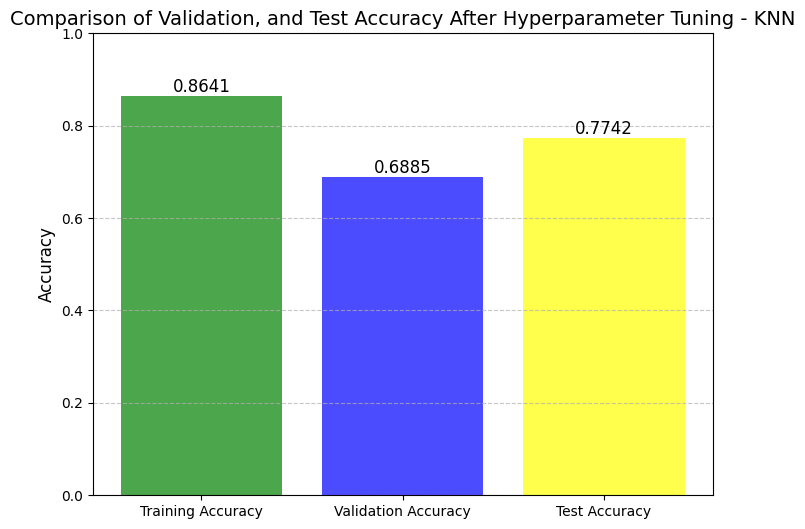

In [ ]:
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [trainAcc_knnA, valAcc_knnA, testAcc_knnA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test Accuracy After Hyperparameter Tuning - KNN", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confussion Matrix

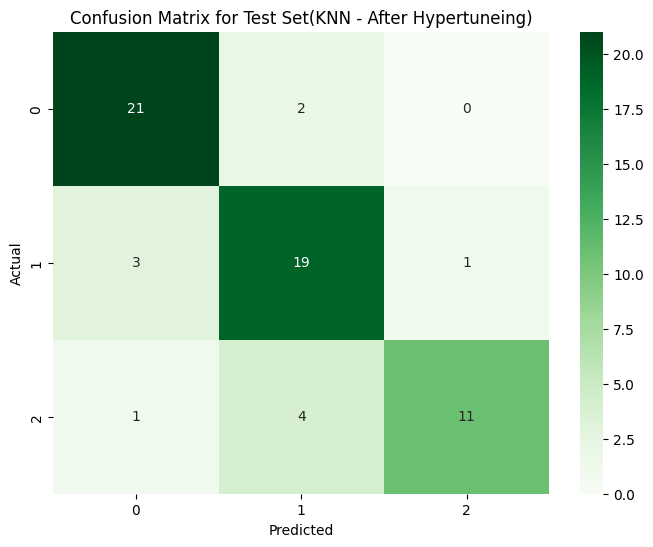

In [ ]:
#for test set
cm = confusion_matrix(y_test, y_Testpred_best_knnA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(KNN - After Hypertuneing)")
plt.show()

Clasification Report

In [ ]:
#for the training set
train_classification_report = classification_report(y_trainB, y_trainpred_best_knnA)

#for the validation set
val_classification_report = classification_report(y_val, y_TValpred_best_knnA)

#for the test set
test_classification_report = classification_report(y_test, y_Testpred_best_knnA)

#print the classification reports
print("Hypertuning Training Classification Report(KNN):\n", train_classification_report)
print("Hypertuning Validation Classification Report(KNN):\n", val_classification_report)
print("\nHypertuning Test Classification Report(KNN):\n", test_classification_report)

Hypertuning Training Classification Report(KNN):
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       136
           1       0.84      0.76      0.80       136
           2       0.93      0.85      0.89       136

    accuracy                           0.87       408
   macro avg       0.87      0.87      0.87       408
weighted avg       0.87      0.87      0.87       408

Hypertuning Validation Classification Report(KNN):
               precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.67      0.69      0.68        29
           2       0.82      0.61      0.70        23

    accuracy                           0.69        61
   macro avg       0.69      0.73      0.69        61
weighted avg       0.71      0.69      0.69        61


Hypertuning Test Classification Report(KNN):
               precision    recall  f1-score   support

           0       0.84      0.91 

In [ ]:
#create a pickle file for KNN model
knn_AD_model_pickle = open('knn_ADmodel.pkl', 'wb')
pickle.dump(best_knn_model, knn_AD_model_pickle)
knn_AD_model_pickle.close()

.

.

# **Naive Bayes**

In [ ]:
#train the initial Naive Bayes model
nb = GaussianNB()
nb.fit(X_trainB, y_trainB)

GaussianNB()

In [ ]:
#predict on train, validation, and test sets
y_train_pred_nbB = nb.predict(X_trainB)
y_val_pred_nbB = nb.predict(X_val)
y_test_pred_nbB = nb.predict(X_test)

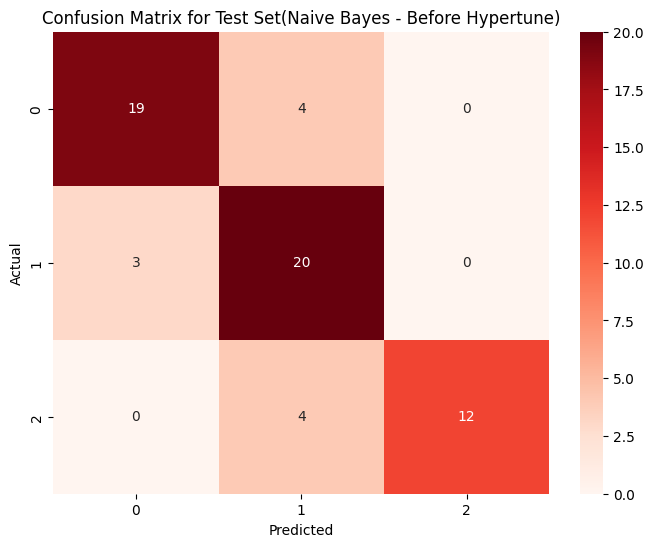

In [ ]:
#confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred_nbB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(Naive Bayes - Before Hypertune)")
plt.show()

In [ ]:
#classification reports
print("\nClassification Report for Training Set(Naive Bayes - Before Hypertune):")
print(classification_report(y_trainB, y_train_pred_nbB))

print("\nClassification Report for Validation Set(Naive Bayes - Before Hypertune):")
print(classification_report(y_val, y_val_pred_nbB))

print("\nClassification Report for Test Set(Naive Bayes - Before Hypertune):")
print(classification_report(y_test, y_test_pred_nbB))


Classification Report for Training Set(Naive Bayes - Before Hypertune):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       136
           1       0.87      0.86      0.86       136
           2       0.87      0.87      0.87       136

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408


Classification Report for Validation Set(Naive Bayes - Before Hypertune):
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.82      0.79      0.81        29
           2       0.83      0.83      0.83        23

    accuracy                           0.82        61
   macro avg       0.82      0.84      0.83        61
weighted avg       0.82      0.82      0.82        61


Classification Report for Test Set(Naive Bayes - Before Hypertune):
              precisi

Mean Squard Error(MSE)

In [ ]:
train_mse_nbB = mean_squared_error(y_trainB, y_train_pred_nbB)
val_mse_nbB = mean_squared_error(y_val, y_val_pred_nbB)
test_mse_nbB = mean_squared_error(y_test, y_test_pred_nbB)

In [ ]:
print(f"Naive Bayes Training Mean Squard Error(MSE): {train_mse_nbB}")
print(f"Naive Bayes Validation Mean Squard Error(MSE): {val_mse_nbB}")
print(f"Naive Bayes Test Mean Squard Error(MSE): {test_mse_nbB}")

Naive Bayes Training Mean Squard Error(MSE): 0.09068627450980392
Naive Bayes Validation Mean Squard Error(MSE): 0.18032786885245902
Naive Bayes Test Mean Squard Error(MSE): 0.1774193548387097


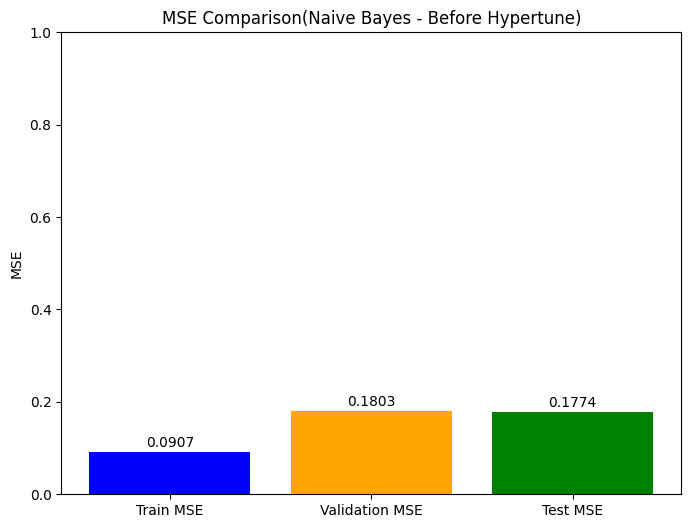

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_nbB, val_mse_nbB, test_mse_nbB], color=["blue", "orange", "green"])
plt.title("MSE Comparison(Naive Bayes - Before Hypertune)")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha="center", va="bottom", fontsize=10)

plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
train_acc_nbB = 1 - train_mse_nbB
val_acc_nbB = 1 - val_mse_nbB
test_acc_nbB = 1 - test_mse_nbB

In [ ]:
print(f"Naive Bayes Training Accuracy: {train_acc_nbB}")
print(f"Naive Bayes Validation Accuracy: {val_acc_nbB}")
print(f"Naive Bayes Test Accuracy: {test_acc_nbB}")

Naive Bayes Training Accuracy: 0.9093137254901961
Naive Bayes Validation Accuracy: 0.819672131147541
Naive Bayes Test Accuracy: 0.8225806451612903


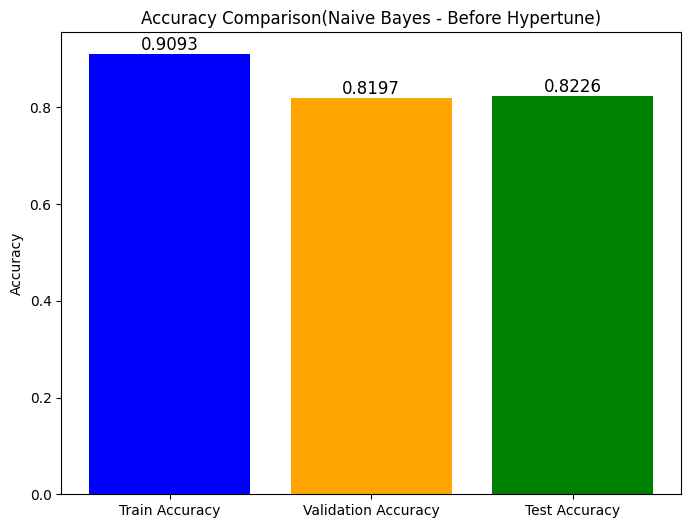

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_nbB, val_acc_nbB, test_acc_nbB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison(Naive Bayes - Before Hypertune)")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.show()

**After Hypertune**

In [ ]:
param_grid = {
    #'var_smoothing': [1e-19, 1e-18, 1e-17, 1e-16, 1e-15]
    #'var_smoothing': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16]
    'var_smoothing': [1e-30, 1e-29, 1e-28, 1e-27, 1e-26]
}

#initialize the naive bayes classifier
nb = GaussianNB()

#GridSearchCV for hyperparameter tuning
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [ ]:
#fit GridSearchCV on training set
grid_search_nb.fit(X_trainB, y_trainB)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-30, 1e-29, 1e-28, 1e-27, 1e-26]},
             scoring='accuracy', verbose=2)

In [ ]:
#best parameters and model
best_params_nbA = grid_search_nb.best_params_
print("Best Hyperparameters for Naive Bayes:", best_params_nbA)

Best Hyperparameters for Naive Bayes: {'var_smoothing': 1e-30}


In [ ]:
#get the best model after tuning
best_nb_model = grid_search_nb.best_estimator_

In [ ]:
#predict
# y_Testpred_best_nbA = best_nb_model.predict(X_test)
# y_Valpred_best_nbA = best_nb_model.predict(X_val)

In [ ]:
#evaluate the tuned model
y_train_best_pred_nbA = best_nb_model.predict(X_trainB)
y_val_best_pred_nbA = best_nb_model.predict(X_val)
y_test_best_pred_nbA = best_nb_model.predict(X_test)

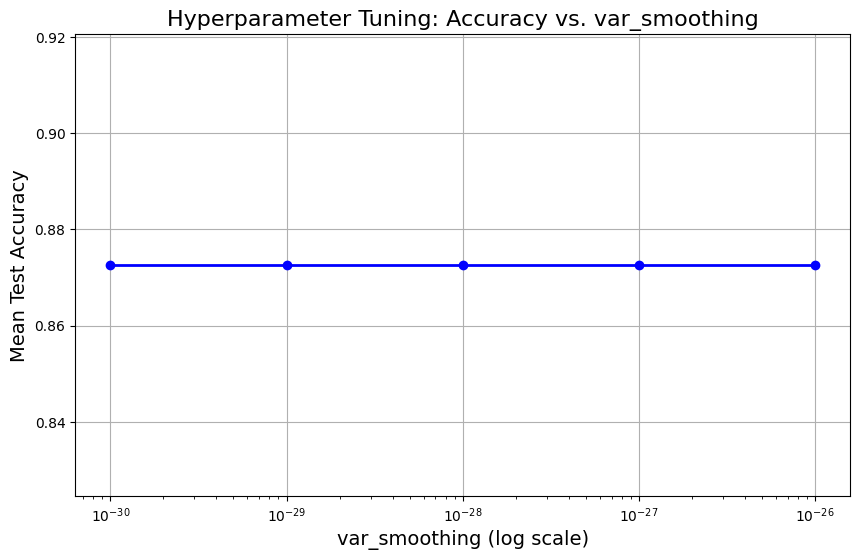

In [ ]:
#plot
results = grid_search_nb.cv_results_

mean_test_scores = results['mean_test_score']
param_values = results['param_var_smoothing'].data

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.xscale('log')
plt.xlabel('var_smoothing (log scale)', fontsize=14)
plt.ylabel('Mean Test Accuracy', fontsize=14)
plt.title('Hyperparameter Tuning: Accuracy vs. var_smoothing', fontsize=16)
plt.grid(True)
plt.show()

Identify the optimal var_smoothing value for the model.

Mean Squard Error(MSE)

In [ ]:
train_mse_nbA = mean_squared_error(y_trainB, y_train_best_pred_nbA)
val_mse_nbA = mean_squared_error(y_val, y_val_best_pred_nbA)
test_mse_nbA = mean_squared_error(y_test, y_test_best_pred_nbA)

print("Hypertune Naive Bayes Mean Squared Error (MSE) of Training:", train_mse_nbA)
print("Hypertune Naive Bayes Mean Squared Error (MSE) of Validation:", val_mse_nbA)
print("Hypertune Naive Bayes Mean Squared Error (MSE) of Testing:", test_mse_nbA)

Hypertune Naive Bayes Mean Squared Error (MSE) of Training: 0.08922548637893521
Hypertune Naive Bayes Mean Squared Error (MSE) of Validation: 0.17822243675243468
Hypertune Naive Bayes Mean Squared Error (MSE) of Testing: 0.1752298364887118


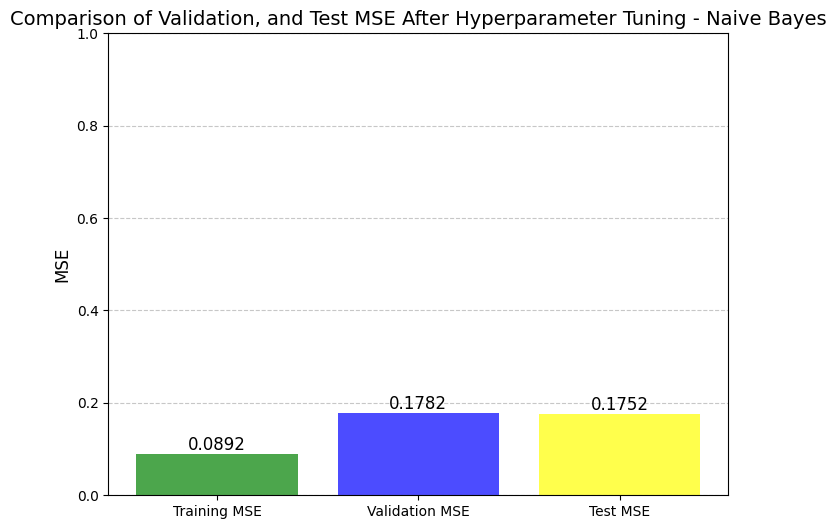

In [ ]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [train_mse_nbA, val_mse_nbA, test_mse_nbA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test MSE After Hyperparameter Tuning - Naive Bayes", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
train_acc_nbA = 1 - train_mse_nbA
test_acc_nbA = 1 - test_mse_nbA
val_acc_nbA = 1 - val_mse_nbA

print("Hypertune Naive Bayes Training Accuracy:", train_acc_nbA)
print("Hypertune Naive Bayes Test Accuracy:", test_acc_nbA)
print("Hypertune Naive Bayes Validation Accuracy:", val_acc_nbA)

Hypertune Naive Bayes Training Accuracy: 0.9107745136210648
Hypertune Naive Bayes Test Accuracy: 0.8247701635112882
Hypertune Naive Bayes Validation Accuracy: 0.8217775632475653


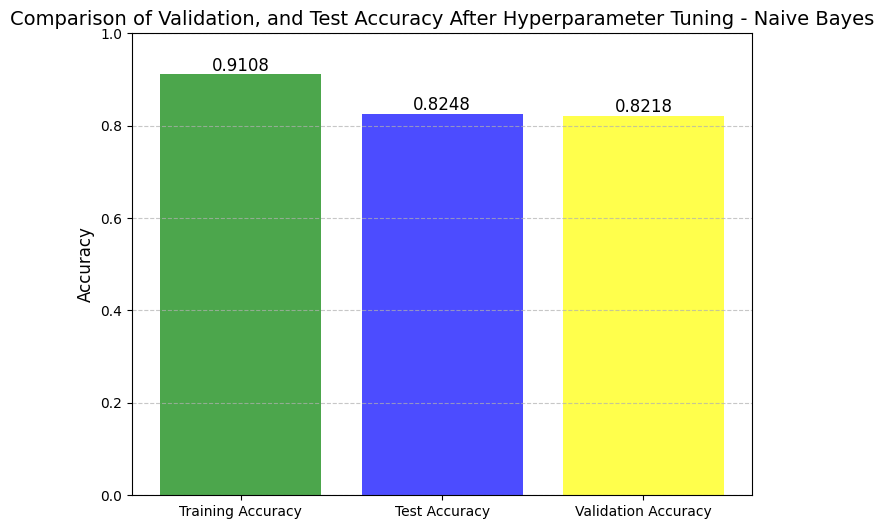

In [ ]:
x_labels = ['Training Accuracy', 'Test Accuracy', 'Validation Accuracy']
accuracies = [train_acc_nbA, test_acc_nbA, val_acc_nbA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Validation, and Test Accuracy After Hyperparameter Tuning - Naive Bayes", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confution Matrix

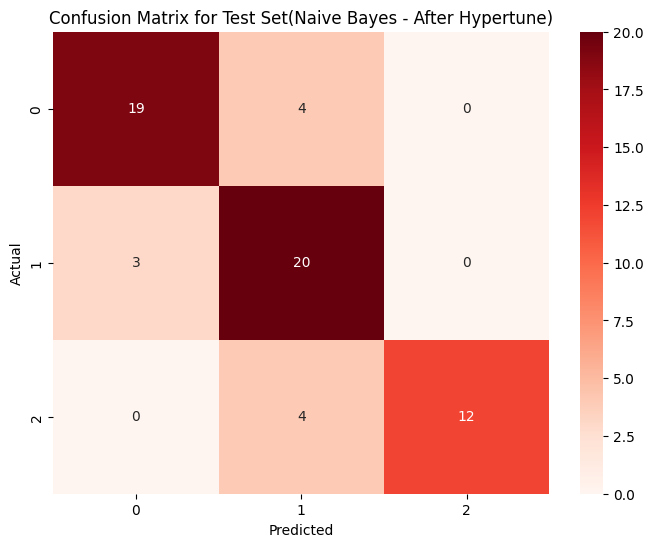

In [ ]:
#for the test set
cm = confusion_matrix(y_test, y_test_best_pred_nbA)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(Naive Bayes - After Hypertune)")
plt.show()

Clasification Reports

In [ ]:
print("\nClassification Report for Training Set (Naive Bayes - After Hypertune):")
print(classification_report(y_trainB, y_train_best_pred_nbA))

print("\nClassification Report for Validation Set (Naive Bayes - After Hypertune):")
print(classification_report(y_val, y_val_best_pred_nbA))

print("\nClassification Report for Test Set (Naive Bayes - After Hypertune):")
print(classification_report(y_test, y_test_best_pred_nbA))


Classification Report for Training Set (Naive Bayes - After Hypertune):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       136
           1       0.87      0.86      0.86       136
           2       0.87      0.87      0.87       136

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408


Classification Report for Validation Set (Naive Bayes - After Hypertune):
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.82      0.79      0.81        29
           2       0.83      0.83      0.83        23

    accuracy                           0.82        61
   macro avg       0.82      0.84      0.83        61
weighted avg       0.82      0.82      0.82        61


Classification Report for Test Set (Naive Bayes - After Hypertune):
              precisi

In [ ]:
#create a pickle file for Naive Bayes model
nb_AD_model_pickle = open('nb_ADmodel.pkl', 'wb')
pickle.dump(best_nb_model, nb_AD_model_pickle)
nb_AD_model_pickle.close()

.

.

# **Logistic Regression Classifier**

In [ ]:
#initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
#train the model
log_reg.fit(X_trainB, y_trainB)

LogisticRegression(max_iter=1000)

In [ ]:
#predict on train, validation, and test sets
y_train_pred_log_regB = log_reg.predict(X_trainB)
y_val_pred_log_regB = log_reg.predict(X_val)
y_test_pred_log_regB = log_reg.predict(X_test)

In [ ]:
#classification report
print("\nClassification Report for Training Set(Logistic Regression - Before Hypertuning):")
print(classification_report(y_trainB, y_train_pred_log_regB))

print("\nClassification Report for Validation Set(Logistic Regression - Before Hypertuning):")
print(classification_report(y_val, y_val_pred_log_regB))

print("\nClassification Report for Test Set(Logistic Regression - Before Hypertuning):")
print(classification_report(y_test, y_test_pred_log_regB))


Classification Report for Training Set(Logistic Regression - Before Hypertuning):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       136
           1       0.84      0.86      0.85       136
           2       0.90      0.84      0.87       136

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408


Classification Report for Validation Set(Logistic Regression - Before Hypertuning):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.76      0.86      0.81        29
           2       0.88      0.65      0.75        23

    accuracy                           0.80        61
   macro avg       0.82      0.84      0.82        61
weighted avg       0.81      0.80      0.80        61


Classification Report for Test Set(Logistic Regression - Before Hyper

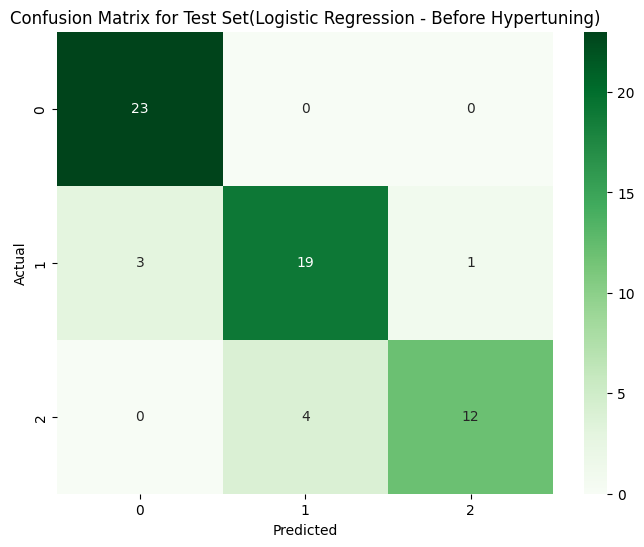

In [ ]:
#confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred_log_regB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(Logistic Regression - Before Hypertuning)")
plt.show()

Mean Squard Error(MSE)

In [ ]:
train_mse_log_regB = mean_squared_error(y_trainB, y_train_pred_log_regB)
val_mse_log_regB = mean_squared_error(y_val, y_val_pred_log_regB)
test_mse_log_regB = mean_squared_error(y_test, y_test_pred_log_regB)

print(f"Logistic Regression Training Mean Squard Error(MSE) - Before Hypertune: {train_mse_log_regB}")
print(f"Logistic Regression Validation Mean Squard Error(MSE) - Before Hypertune: {val_mse_log_regB}")
print(f"Logistic Regression Test Mean Squard Error(MSE) - Before Hypertune: {test_mse_log_regB}")

Logistic Regression Training Mean Squard Error(MSE) - Before Hypertune: 0.10049019607843138
Logistic Regression Validation Mean Squard Error(MSE) - Before Hypertune: 0.19672131147540983
Logistic Regression Test Mean Squard Error(MSE) - Before Hypertune: 0.12903225806451613


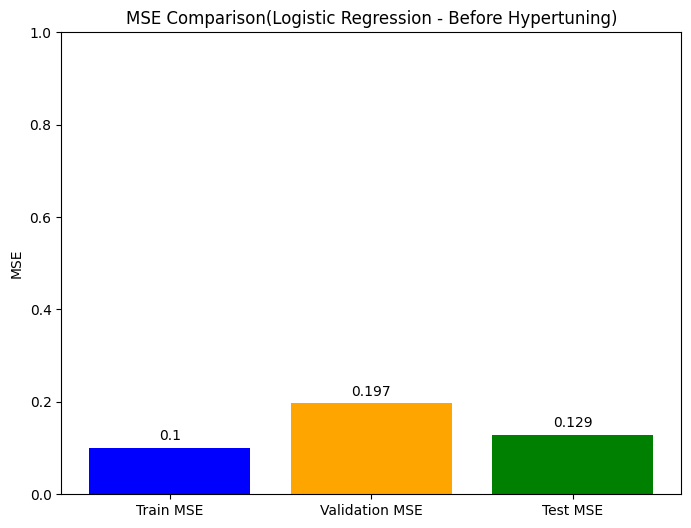

In [ ]:
#plot MSE
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_log_regB, val_mse_log_regB, test_mse_log_regB], color=["blue", "orange", "green"])
plt.title("MSE Comparison(Logistic Regression - Before Hypertuning)")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
train_acc_log_regB = 1 - train_mse_log_regB
val_acc_log_regB = 1 - val_mse_log_regB
test_acc_log_regB = 1 - test_mse_log_regB

print(f"Logistic Regression Training Accuracy(Before Hypertune): {train_acc_log_regB}")
print(f"Logistic Regression Validation Accuracy(Before Hypertune): {val_acc_log_regB}")
print(f"Logistic Regression Test Accuracy(Before Hypertune): {test_acc_log_regB}")

Logistic Regression Training Accuracy(Before Hypertune): 0.8995098039215687
Logistic Regression Validation Accuracy(Before Hypertune): 0.8032786885245902
Logistic Regression Test Accuracy(Before Hypertune): 0.8709677419354839


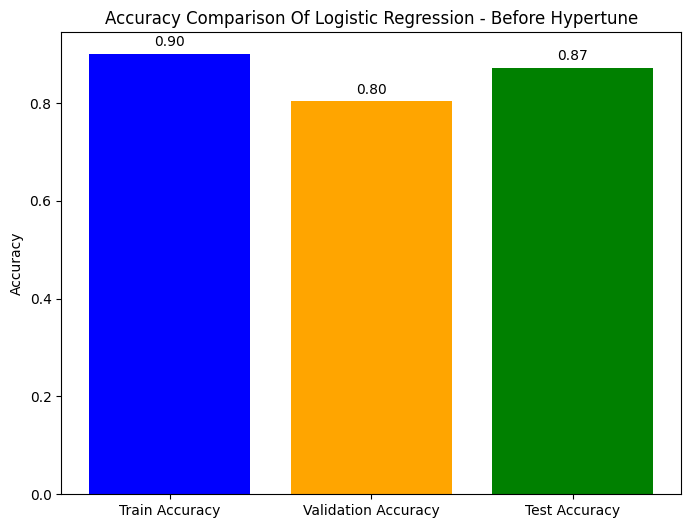

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_log_regB, val_acc_log_regB, test_acc_log_regB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison Of Logistic Regression - Before Hypertune")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

**After Hypertune**

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 2000]
}

#initialize the logistic regression model
log_reg = LogisticRegression()

# Use Stratified K-Fold cross-validation to ensure balanced class splits
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV with stratified splits
grid_search_log_reg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    verbose=2,
    n_jobs=-1
)

In [ ]:
# Fit the grid search to the training data
grid_search_log_reg.fit(X_trainB, y_trainB)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000],
                         'max_iter': [1000, 2000], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
#get the best parameters
best_params_log_regA = grid_search_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_log_regA)

Best Hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#get the best model after tuning
best_log_reg_model = grid_search_log_reg.best_estimator_

In [ ]:
#predict
y_Trainpred_best_log_regA = best_log_reg_model.predict(X_trainB)
y_Testpred_best_log_regA = best_log_reg_model.predict(X_test)
y_Valpred_best_log_regA = best_log_reg_model.predict(X_val)

Mean Squard Error

In [ ]:
train_mse_log_regA = mean_squared_error(y_trainB, y_Trainpred_best_log_regA)
val_mse_log_regA = mean_squared_error(y_val, y_Valpred_best_log_regA)
test_mse_log_regA = mean_squared_error(y_test, y_Testpred_best_log_regA)

print(f"Hypertuning Mean Squard Error(MSE) of Logistic Regression Training Data: {train_mse_log_regA}")
print(f"Hypertuning Mean Squard Error(MSE) of Logistic Regression Validation Data: {val_mse_log_regA}")
print(f"Hypertuning Mean Squard Error(MSE) of Logistic Regression Testing Data: {test_mse_log_regA}")

Hypertuning Mean Squard Error(MSE) of Logistic Regression Training Data: 0.09068627450980392
Hypertuning Mean Squard Error(MSE) of Logistic Regression Validation Data: 0.19672131147540983
Hypertuning Mean Squard Error(MSE) of Logistic Regression Testing Data: 0.12903225806451613


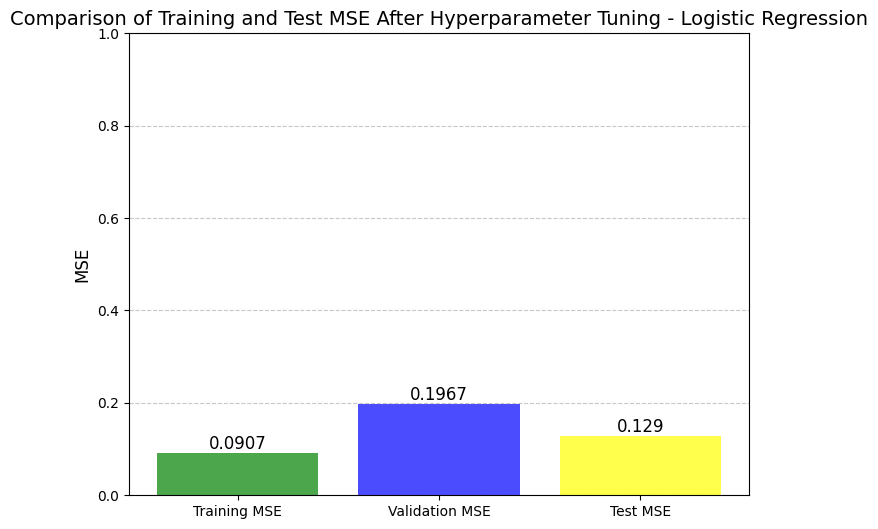

In [ ]:
x_labels = ['Training MSE', 'Validation MSE', 'Test MSE']
accuracies = [train_mse_log_regA, val_mse_log_regA, test_mse_log_regA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Training and Test MSE After Hyperparameter Tuning - Logistic Regression", fontsize=14)
plt.ylabel("MSE", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Accuracy

In [ ]:
train_acc_log_regA = 1 - train_mse_log_regA
val_acc_log_regA = 1 - val_mse_log_regA
test_acc_log_regA = 1 - test_mse_log_regA

print(f"Logistic Regression Training Accuracy(After Hypertune): {train_acc_log_regA}")
print(f"Logistic Regression Validation Accuracy(After Hypertune): {val_acc_log_regA}")
print(f"Logistic Regression Test Accuracy(After Hypertune): {test_acc_log_regA}")

Logistic Regression Training Accuracy(After Hypertune): 0.9093137254901961
Logistic Regression Validation Accuracy(After Hypertune): 0.8032786885245902
Logistic Regression Test Accuracy(After Hypertune): 0.8709677419354839


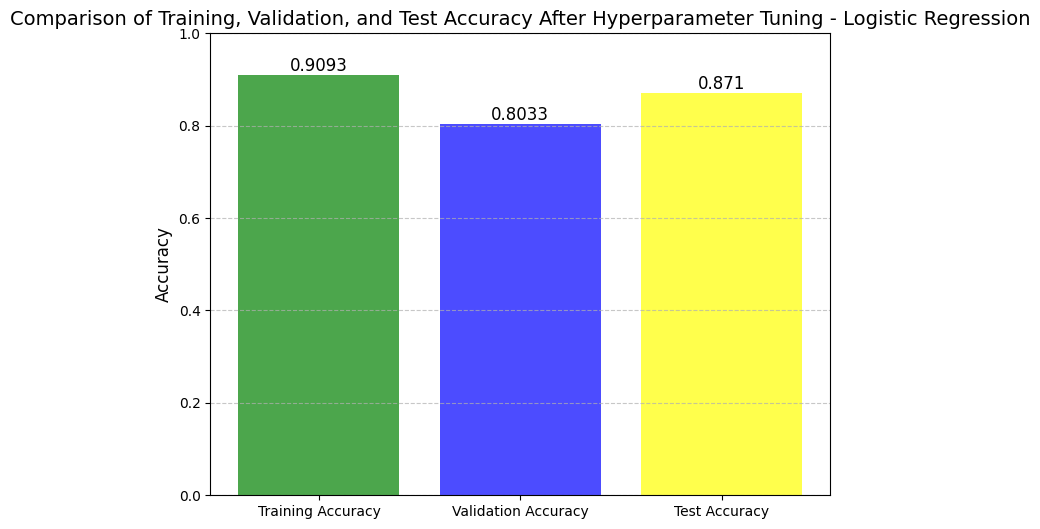

In [ ]:
x_labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [train_acc_log_regA, val_acc_log_regA, test_acc_log_regA]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, accuracies, color=['green', 'blue', 'yellow'], alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.title("Comparison of Training, Validation, and Test Accuracy After Hyperparameter Tuning - Logistic Regression", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Confussion Matrix

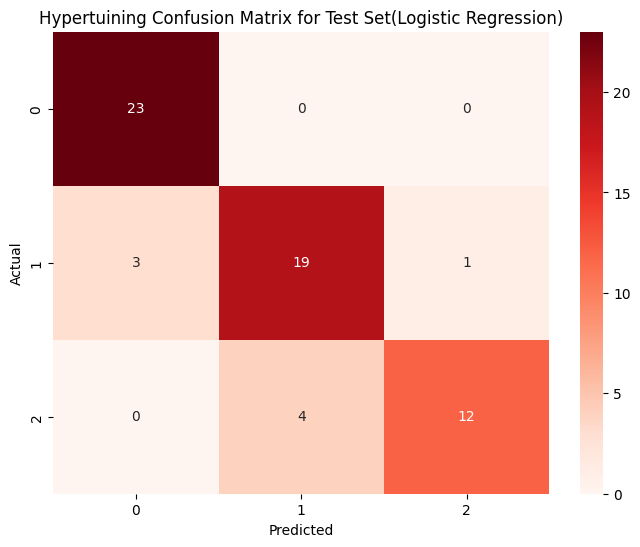

In [ ]:
cm = confusion_matrix(y_test, y_Testpred_best_log_regA)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Hypertuining Confusion Matrix for Test Set(Logistic Regression)")
plt.show()

Clasification Report

In [ ]:
#for the training set
train_classification_report = classification_report(y_trainB, y_Trainpred_best_log_regA)

#for the validation set
val_classification_report = classification_report(y_val, y_Valpred_best_log_regA)

#for the test set
test_classification_report = classification_report(y_test, y_Testpred_best_log_regA)

#print the classification reports
print("Hypertuining Training Classification Report(Logistic Regression):\n", train_classification_report)
print("Hypertuining Validation Classification Report(Logistic Regression):\n", val_classification_report)
print("\nHypertuining Test Classification Report(Logistic Regression):\n", test_classification_report)

Hypertuining Training Classification Report(Logistic Regression):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       136
           1       0.85      0.88      0.87       136
           2       0.91      0.85      0.88       136

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408

Hypertuining Validation Classification Report(Logistic Regression):
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.76      0.86      0.81        29
           2       0.88      0.65      0.75        23

    accuracy                           0.80        61
   macro avg       0.82      0.84      0.82        61
weighted avg       0.81      0.80      0.80        61


Hypertuining Test Classification Report(Logistic Regression):
               precision    recall  f1-

In [ ]:
#create a pickle file for Logistic Regression model
lr_AD_model_pickle = open('lr_ADmodel.pkl', 'wb')
pickle.dump(best_log_reg_model, lr_AD_model_pickle)
lr_AD_model_pickle.close()

.

.

# **Neural Network Model**

In [ ]:
#initialize the neural network model
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
#train the model
mlp_model.fit(X_trainB, y_trainB)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
#predict on train, validation, and test sets
y_train_pred_mlpB = mlp_model.predict(X_trainB)
y_val_pred_mlpB = mlp_model.predict(X_val)
y_test_pred_mlpB = mlp_model.predict(X_test)

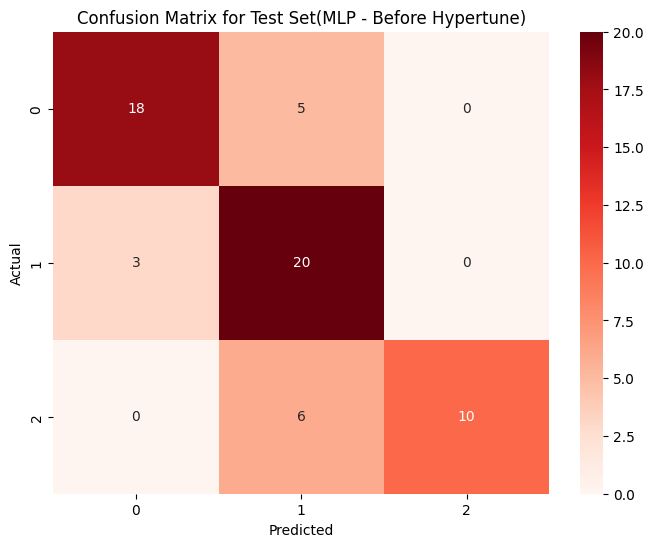

In [ ]:
#confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred_mlpB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set(MLP - Before Hypertune)")
plt.show()

Mean Squard Error(MSE)

In [ ]:
train_mse_mlpB = mean_squared_error(y_trainB, y_train_pred_mlpB)
val_mse_mlpB = mean_squared_error(y_val, y_val_pred_mlpB)
test_mse_mlpB = mean_squared_error(y_test, y_test_pred_mlpB)

print(f"MLP Training Mean Squard Error(MSE) - Before Hypertune: {train_mse_mlpB}")
print(f"MLP Validation Mean Squard Error(MSE) - Before Hypertune: {val_mse_mlpB}")
print(f"MLP Test Mean Squard Error(MSE) - Before Hypertune: {test_mse_mlpB}")

MLP Training Mean Squard Error(MSE) - Before Hypertune: 0.0661764705882353
MLP Validation Mean Squard Error(MSE) - Before Hypertune: 0.29508196721311475
MLP Test Mean Squard Error(MSE) - Before Hypertune: 0.22580645161290322


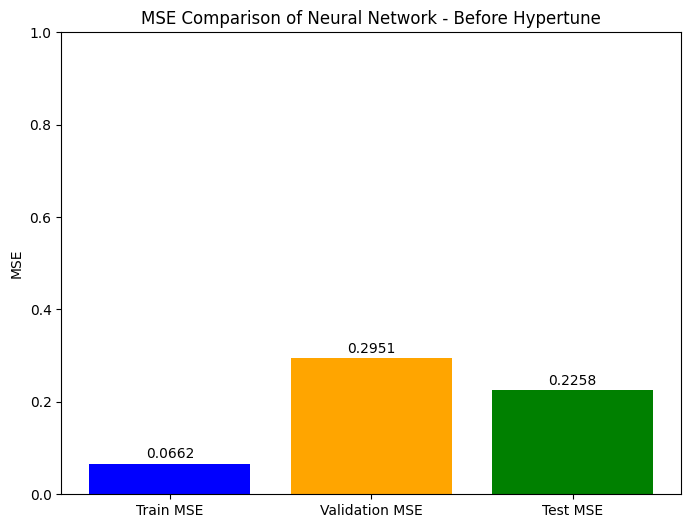

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train MSE", "Validation MSE", "Test MSE"], [train_mse_mlpB, val_mse_mlpB, test_mse_mlpB], color=["blue", "orange", "green"])
plt.title("MSE Comparison of Neural Network - Before Hypertune")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha="center", va="bottom", fontsize=10)

plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
train_acc_mlpB = 1 - train_mse_mlpB
val_acc_mlpB = 1 - val_mse_mlpB
test_acc_mlpB = 1 - test_mse_mlpB

print(f"MLP Training Accuracy - Before Hypertune: {train_acc_mlpB}")
print(f"MLP Validation Accuracy - Before Hypertune: {val_acc_mlpB}")
print(f"MLP Test Accuracy - Before Hypertune: {test_acc_mlpB}")

MLP Training Accuracy - Before Hypertune: 0.9338235294117647
MLP Validation Accuracy - Before Hypertune: 0.7049180327868853
MLP Test Accuracy - Before Hypertune: 0.7741935483870968


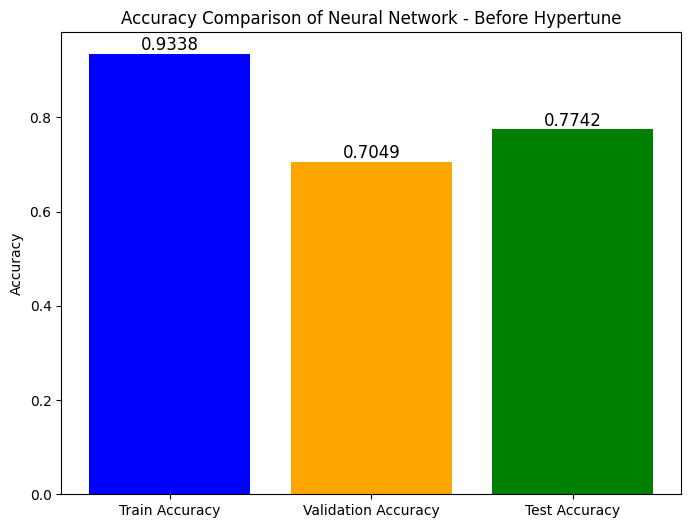

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Train Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_mlpB, val_acc_mlpB, test_acc_mlpB], color=["blue", "orange", "green"])
plt.title("Accuracy Comparison of Neural Network - Before Hypertune")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.show()

In [ ]:
#classification reports
print("\nClassification Report for Training Set(MLP - Before Hypertune):")
print(classification_report(y_trainB, y_train_pred_mlpB))

print("\nClassification Report for Validation Set(MLP - Before Hypertune):")
print(classification_report(y_val, y_val_pred_mlpB))

print("\nClassification Report for Test Set(MLP - Before Hypertune):")
print(classification_report(y_test, y_test_pred_mlpB))


Classification Report for Training Set(MLP - Before Hypertune):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       136
           1       0.88      0.93      0.90       136
           2       0.98      0.87      0.92       136

    accuracy                           0.93       408
   macro avg       0.94      0.93      0.93       408
weighted avg       0.94      0.93      0.93       408


Classification Report for Validation Set(MLP - Before Hypertune):
              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.68      0.72      0.70        29
           2       0.76      0.83      0.79        23

    accuracy                           0.70        61
   macro avg       0.68      0.63      0.64        61
weighted avg       0.70      0.70      0.69        61


Classification Report for Test Set(MLP - Before Hypertune):
              precision    recall  f1-score  

**After Hypertune**

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(25, 25), (25, 50), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

#initialize the MLPClassifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

#fit the grid search to the training data
grid_search_mlp.fit(X_trainB, y_trainB)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(25, 25), (25, 50), (50, 50),
                                                (100, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

In [ ]:
#get the best parameters
best_params_mlpA = grid_search_mlp.best_params_
print("Best Hyperparameters for Neural Network:", best_params_mlpA)

Best Hyperparameters for Neural Network: {'activation': 'logistic', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
#get the best model after tuning
best_mlp_model = grid_search_mlp.best_estimator_

In [ ]:
#evaluate the tuned model
y_train_best_pred_mlpA = best_mlp_model.predict(X_trainB)
y_val_best_pred_mlpA = best_mlp_model.predict(X_val)
y_test_best_pred_mlpA = best_mlp_model.predict(X_test)

Mean Squard Error(MSE)

In [ ]:
train_mse_mlpA = mean_squared_error(y_trainB, y_train_best_pred_mlpA)
val_mse_mlpA = mean_squared_error(y_val, y_val_best_pred_mlpA)
test_mse_mlpA = mean_squared_error(y_test, y_test_best_pred_mlpA)

print("Hypertuining Mean Squared Error (MSE) for MLP of Training Data:", train_mse_mlpA)
print("Hypertuining Mean Squared Error (MSE) for MLP of Validation Data:", val_mse_mlpA)
print("Hypertuining Mean Squared Error (MSE) for MLP of Testing Data:", test_mse_mlpA)

Hypertuining Mean Squared Error (MSE) for MLP of Training Data: 0.12745098039215685
Hypertuining Mean Squared Error (MSE) for MLP of Validation Data: 0.26229508196721313
Hypertuining Mean Squared Error (MSE) for MLP of Testing Data: 0.12903225806451613


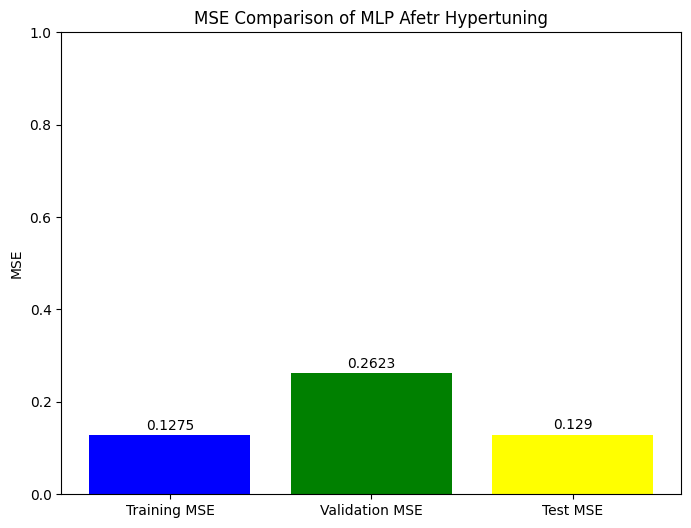

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Training MSE", "Validation MSE", "Test MSE"], [train_mse_mlpA, val_mse_mlpA, test_mse_mlpA], color=["blue", "green", 'yellow'])
plt.title("MSE Comparison of MLP Afetr Hypertuning")
plt.ylabel("MSE")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha="center", va="bottom", fontsize=10)

plt.ylim(0, 1)
plt.show()

Accuracy

In [ ]:
train_acc_mlpA = 1 - train_mse_mlpA
val_acc_mlpA = 1 - val_mse_mlpA
test_acc_mlpA = 1 - test_mse_mlpA

print("Hypertuining MLP Training Accuracy of Training Data:", train_acc_mlpA)
print("Hypertuining MLP Validation Accuracy of Validation Data:", val_acc_mlpA)
print("Hypertuining MLP Test Accuracy of Testing Data:", test_acc_mlpA)

Hypertuining MLP Training Accuracy of Training Data: 0.8725490196078431
Hypertuining MLP Validation Accuracy of Validation Data: 0.7377049180327868
Hypertuining MLP Test Accuracy of Testing Data: 0.8709677419354839


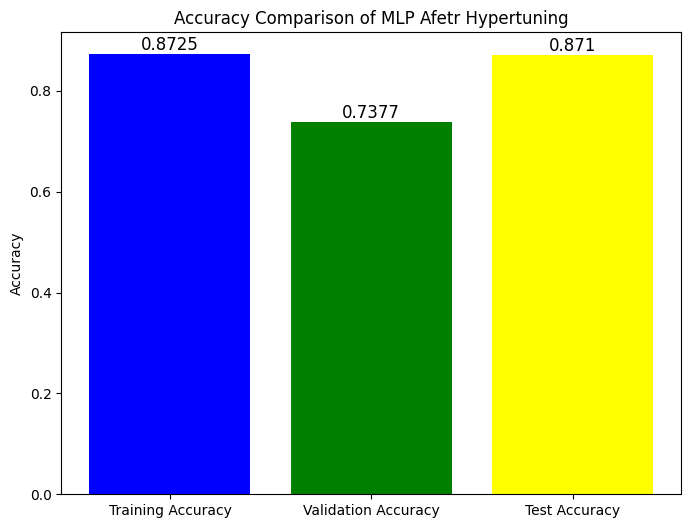

In [ ]:
#plot
plt.figure(figsize=(8, 6))
bars = plt.bar(["Training Accuracy", "Validation Accuracy", "Test Accuracy"], [train_acc_mlpA, val_acc_mlpA, test_acc_mlpA], color=["blue", "green", 'yellow'])
plt.title("Accuracy Comparison of MLP Afetr Hypertuning")
plt.ylabel("Accuracy")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha="center", va="bottom", fontsize=12)

plt.show()

Confusion Matrix

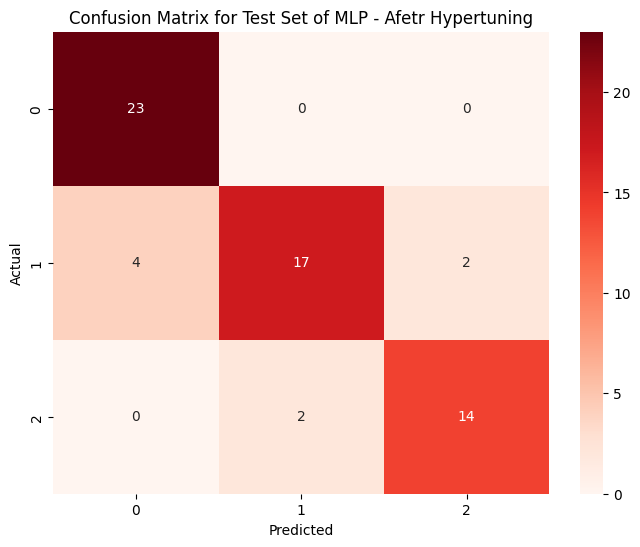

In [ ]:
cm = confusion_matrix(y_test, y_test_best_pred_mlpA)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Set of MLP - Afetr Hypertuning")
plt.show()

Clasification Report

In [ ]:
print("\nHypertuining Classification Report for Training Set (MLP):")
print(classification_report(y_trainB, y_train_best_pred_mlpA))

print("\nHypertuining Classification Report for Validation Set (MLP):")
print(classification_report(y_val, y_val_best_pred_mlpA))

print("\nHypertuining Classification Report for Test Set (MLP):")
print(classification_report(y_test, y_test_best_pred_mlpA))


Hypertuining Classification Report for Training Set (MLP):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       136
           1       0.89      0.71      0.79       136
           2       0.81      0.91      0.86       136

    accuracy                           0.87       408
   macro avg       0.87      0.87      0.87       408
weighted avg       0.87      0.87      0.87       408


Hypertuining Classification Report for Validation Set (MLP):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.88      0.52      0.65        29
           2       0.64      0.91      0.75        23

    accuracy                           0.74        61
   macro avg       0.78      0.81      0.77        61
weighted avg       0.78      0.74      0.73        61


Hypertuining Classification Report for Test Set (MLP):
              precision    recall  f1-score   support

     

In [ ]:
#create a pickle file for MLP model
mlp_AD_model_pickle = open('mlp_ADmodel.pkl', 'wb')
pickle.dump(best_mlp_model, mlp_AD_model_pickle)
mlp_AD_model_pickle.close()

.

In [ ]:
# Random Forest - Performance improved post-hypertuning, but recall is still lower on the test set.
# KNN - Struggles with recall on the validation and test sets.
# Naive Bayes - Consistently high performance on training and validation sets, but test set recall is lower.
# Neural Network - Struggles with recall, though performs well in training set accuracy.

### Logistic Regression - BEST MODEL [Consistently achieved the highest accuracy and balanced precision, recall, and f1-scores.]

***Best Model - Logistic Regression***

.

.

# Explainability Models

Random Forest

Model loaded: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Features used for explanation: ['Gender', 'Age', 'Family Member w/ Autism', 'Gets along with other children', 'Make eye contact', 'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason', 'Stays Calm', 'Smiles not less sociably']


100%|===================| 1218/1221 [00:25<00:00]        

SHAP values shape: (407, 10, 3)


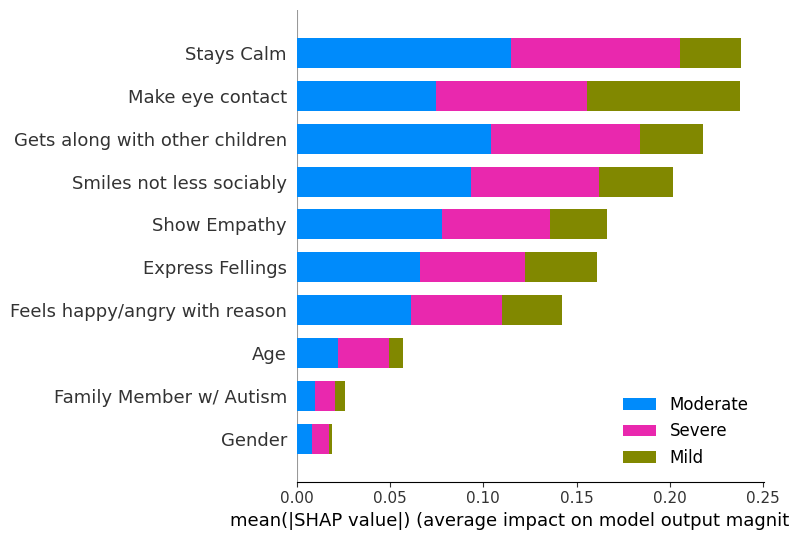

In [ ]:
# Load your saved model
with open('rf_ADmodel.pkl', 'rb') as filerf:
    model = pickle.load(filerf)

print(f"Model loaded: {type(model)}")


# # Extract SHAP values for this sample and class
# shap_vals_for_class = shap_values.values[sample_idx, output_class_idx, :]
# base_val_for_class = shap_values.base_values[output_class_idx]
# X = pd.read_csv('C:\\Users\\User\\Shashani\\Research New\\Backend AD\\AffectiveDomainDataset_R - Copy.csv')
# # Create SHAP Explanation object for waterfall
# single_exp = shap.Explanation(
#     values=shap_vals_for_class,
#     base_values=base_val_for_class,
#     data=X.iloc[sample_idx].values,
#     feature_names=X.columns.tolist()
# )

# Define the exact expected feature columns your model uses
expected_features = [
    'Gender',
    'Age',
    'Family Member w/ Autism',
    'Gets along with other children',
    'Make eye contact',
    'Express Fellings',
    'Show Empathy',
    'Feels happy/angry with reason',
    'Stays Calm',
    'Smiles not less sociably'
]

# Ensure X contains only these columns in this order
X = X[expected_features]
print("Features used for explanation:", X.columns.tolist())

# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

print("SHAP values shape:", shap_values.values.shape)  # (samples, outputs, features)

# Plot SHAP summary plot with renamed class labels
# Check model class order: [0, 2, 1]
custom_class_names = ['Mild', 'Severe', 'Moderate']  # Assuming model.classes_ = [0, 2, 1]

shap.summary_plot(shap_values, X, plot_type="bar", class_names=custom_class_names)


KNN

Model loaded: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Features used for explanation: ['Gender', 'Age', 'Family Member w/ Autism', 'Gets along with other children', 'Make eye contact', 'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason', 'Stays Calm', 'Smiles not less sociably']


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


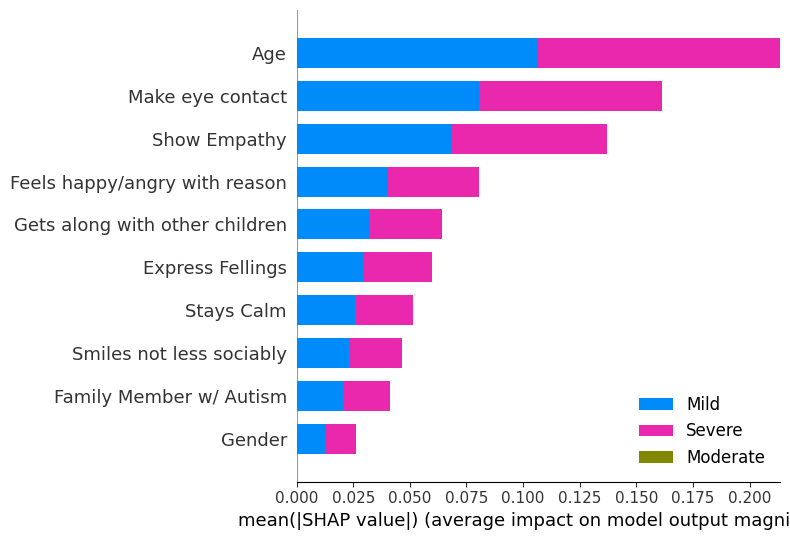

In [ ]:
# Load your saved KNN model
with open('knn_ADmodel.pkl', 'rb') as fileknn:
    model = pickle.load(fileknn)

print(f"Model loaded: {type(model)}")


# # Extract SHAP values for this sample and class
# shap_vals_for_class = shap_values.values[sample_idx, output_class_idx, :]
# base_val_for_class = shap_values.base_values[output_class_idx]
# X = pd.read_csv('C:\\Users\\User\\Shashani\\Research New\\Backend AD\\AffectiveDomainDataset_R - Copy.csv')
# # Create SHAP Explanation object for waterfall
# single_exp = shap.Explanation(
#     values=shap_vals_for_class,
#     base_values=base_val_for_class,
#     data=X.iloc[sample_idx].values,
#     feature_names=X.columns.tolist()
# )

# Define the expected features
expected_features = [
    'Gender',
    'Age',
    'Family Member w/ Autism',
    'Gets along with other children',
    'Make eye contact',
    'Express Fellings',
    'Show Empathy',
    'Feels happy/angry with reason',
    'Stays Calm',
    'Smiles not less sociably'
]

# Filter dataset to include only expected features
X = X[expected_features]
print("Features used for explanation:", X.columns.tolist())

# Sample a small background set for SHAP (for performance)
background = shap.sample(X, 100, random_state=42)

# Use KernelExplainer (good for any black-box model like KNN)
explainer = shap.KernelExplainer(model.predict_proba, background)

# Compute SHAP values for a subset (to avoid high computation cost)
X_to_explain = X.sample(100, random_state=42)
shap_values = explainer.shap_values(X_to_explain)

# Plot SHAP summary (bar) with custom class labels
custom_class_names = ['Mild', 'Severe', 'Moderate']  # Based on assumed class order [0, 2, 1]
shap.summary_plot(shap_values, X_to_explain, plot_type="bar", class_names=custom_class_names)


Naive Bayes

Model loaded: <class 'sklearn.naive_bayes.GaussianNB'>
Features used for explanation: ['Gender', 'Age', 'Family Member w/ Autism', 'Gets along with other children', 'Make eye contact', 'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason', 'Stays Calm', 'Smiles not less sociably']


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


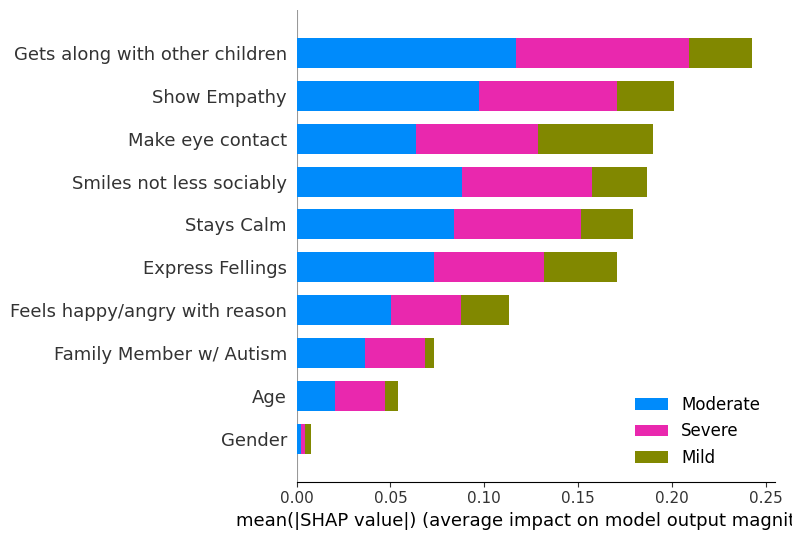

In [ ]:
# Load your saved KNN model
with open('nb_ADmodel.pkl', 'rb') as filenb:
    model = pickle.load(filenb)

print(f"Model loaded: {type(model)}")

# # Extract SHAP values for this sample and class
# shap_vals_for_class = shap_values.values[sample_idx, output_class_idx, :]
# base_val_for_class = shap_values.base_values[output_class_idx]
# X = pd.read_csv('C:\\Users\\User\\Shashani\\Research New\\Backend AD\\AffectiveDomainDataset_R - Copy.csv')
# # Create SHAP Explanation object for waterfall
# single_exp = shap.Explanation(
#     values=shap_vals_for_class,
#     base_values=base_val_for_class,
#     data=X.iloc[sample_idx].values,
#     feature_names=X.columns.tolist()
# )

# Define the expected features
expected_features = [
    'Gender',
    'Age',
    'Family Member w/ Autism',
    'Gets along with other children',
    'Make eye contact',
    'Express Fellings',
    'Show Empathy',
    'Feels happy/angry with reason',
    'Stays Calm',
    'Smiles not less sociably'
]

# Filter dataset to include only expected features
X = X[expected_features]
print("Features used for explanation:", X.columns.tolist())

# Sample a small background set for SHAP (for performance)
background = shap.sample(X, 100, random_state=42)

# Use KernelExplainer (good for any black-box model like KNN)
explainer = shap.KernelExplainer(model.predict_proba, background)

# Compute SHAP values for a subset (to avoid high computation cost)
X_to_explain = X.sample(100, random_state=42)
shap_values = explainer.shap_values(X_to_explain)

# Plot SHAP summary (bar) with custom class labels
custom_class_names = ['Mild', 'Severe', 'Moderate']  # Based on assumed class order [0, 2, 1]
shap.summary_plot(shap_values, X_to_explain, plot_type="bar", class_names=custom_class_names)


Logistic Regression

Model loaded: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Features used for explanation: ['Gender', 'Age', 'Family Member w/ Autism', 'Gets along with other children', 'Make eye contact', 'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason', 'Stays Calm', 'Smiles not less sociably']
SHAP values shape: (407, 10, 3)


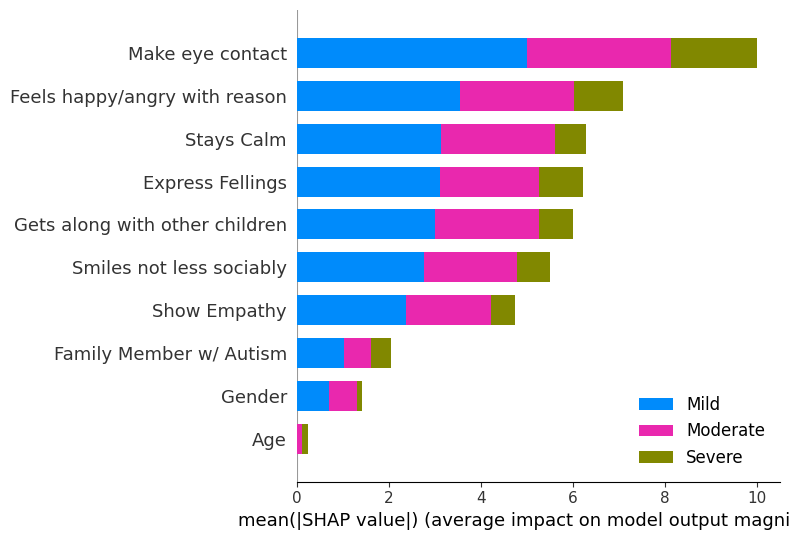

In [ ]:
# Load your saved model
with open('lr_ADmodel.pkl', 'rb') as filelr:
    model = pickle.load(filelr)

print(f"Model loaded: {type(model)}")

# # Extract SHAP values for this sample and class
# shap_vals_for_class = shap_values.values[sample_idx, output_class_idx, :]
# base_val_for_class = shap_values.base_values[output_class_idx]
# X = pd.read_csv('C:\\Users\\User\\Shashani\\Research New\\Backend AD\\AffectiveDomainDataset_R - Copy.csv')
# # Create SHAP Explanation object for waterfall
# single_exp = shap.Explanation(
#     values=shap_vals_for_class,
#     base_values=base_val_for_class,
#     data=X.iloc[sample_idx].values,
#     feature_names=X.columns.tolist()
# )

# Define the exact expected feature columns your model uses
expected_features = [
    'Gender',
    'Age',
    'Family Member w/ Autism',
    'Gets along with other children',
    'Make eye contact',
    'Express Fellings',
    'Show Empathy',
    'Feels happy/angry with reason',
    'Stays Calm',
    'Smiles not less sociably'
]

# Ensure X contains only these columns in this order
X = X[expected_features]
print("Features used for explanation:", X.columns.tolist())

# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

print("SHAP values shape:", shap_values.values.shape)  # (samples, outputs, features)

# Plot SHAP summary plot with renamed class labels
# Check model class order: [0, 2, 1]
custom_class_names = ['Mild', 'Severe', 'Moderate']  # Assuming model.classes_ = [0, 2, 1]

shap.summary_plot(shap_values, X, plot_type="bar", class_names=custom_class_names)


Neural Network

Model loaded: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Features used for explanation: ['Gender', 'Age', 'Family Member w/ Autism', 'Gets along with other children', 'Make eye contact', 'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason', 'Stays Calm', 'Smiles not less sociably']


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [03:15<00:00,  1.95s/it]


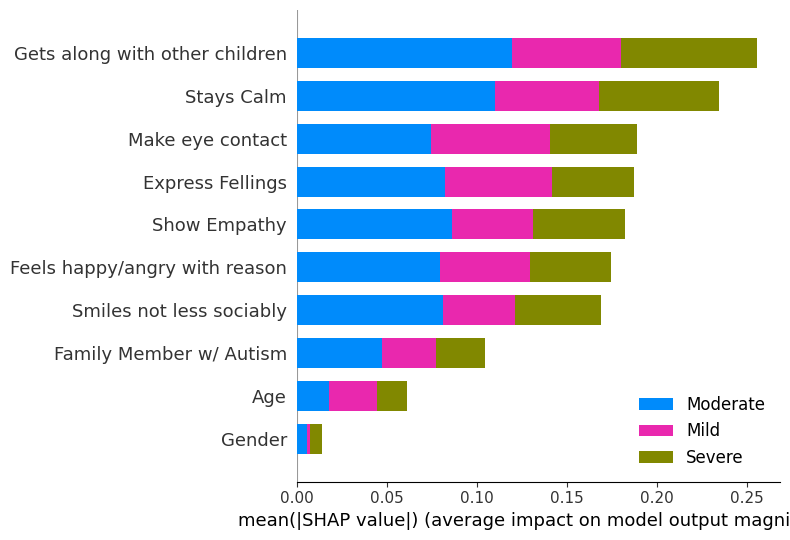

In [ ]:
# Load your saved KNN model
with open('mlp_ADmodel.pkl', 'rb') as filenn:
    model = pickle.load(filenn)

print(f"Model loaded: {type(model)}")

# # Extract SHAP values for this sample and class
# shap_vals_for_class = shap_values.values[sample_idx, output_class_idx, :]
# base_val_for_class = shap_values.base_values[output_class_idx]
# X = pd.read_csv('C:\\Users\\User\\Shashani\\Research New\\Backend AD\\AffectiveDomainDataset_R - Copy.csv')
# # Create SHAP Explanation object for waterfall
# single_exp = shap.Explanation(
#     values=shap_vals_for_class,
#     base_values=base_val_for_class,
#     data=X.iloc[sample_idx].values,
#     feature_names=X.columns.tolist()
# )

# Define the expected features
expected_features = [
    'Gender',
    'Age',
    'Family Member w/ Autism',
    'Gets along with other children',
    'Make eye contact',
    'Express Fellings',
    'Show Empathy',
    'Feels happy/angry with reason',
    'Stays Calm',
    'Smiles not less sociably'
]

# Filter dataset to include only expected features
X = X[expected_features]
print("Features used for explanation:", X.columns.tolist())

# Sample a small background set for SHAP (for performance)
background = shap.sample(X, 100, random_state=42)

# Use KernelExplainer (good for any black-box model like KNN)
explainer = shap.KernelExplainer(model.predict_proba, background)

# Compute SHAP values for a subset (to avoid high computation cost)
X_to_explain = X.sample(100, random_state=42)
shap_values = explainer.shap_values(X_to_explain)

# Plot SHAP summary (bar) with custom class labels
custom_class_names = ['Mild', 'Severe', 'Moderate']  # Based on assumed class order [0, 2, 1]
shap.summary_plot(shap_values, X_to_explain, plot_type="bar", class_names=custom_class_names)


.

.

# **Recommandation System**

**Manually input User Data**

In [ ]:
datasetAD.columns

Index(['Gender', 'Age', 'Family Member w/ Autism',
       'Gets along with other children', 'Make eye contact',
       'Express Fellings', 'Show Empathy', 'Feels happy/angry with reason',
       'Stays Calm', 'Smiles not less sociably', 'Affective Domain Level'],
      dtype='object')

In [ ]:
new_user_manually = {
    'Gender':1,  #male=1, female=0
    'Age': 10,
    'Family Member w/ Autism': 0,   #no family member with autism
    'Gets along with other children': 4,
    'Make eye contact': 3,
    'Express Fellings': 5,
    'Show Empathy':3,
    'Feels happy/angry with reason': 4,
    'Stays Calm': 2,
    'Smiles not less sociably': 3
}

In [ ]:
#convert to model format

new_user_data_manually = np.array([[
                           new_user_manually['Gender'],
                           new_user_manually['Age'],
                           new_user_manually['Family Member w/ Autism'],
                           new_user_manually['Gets along with other children'],
                           new_user_manually['Make eye contact'],
                           new_user_manually['Express Fellings'],
                           new_user_manually['Show Empathy'],
                           new_user_manually['Feels happy/angry with reason'],
                           new_user_manually['Stays Calm'],
                           new_user_manually['Smiles not less sociably']]])

In [ ]:
def suggest_ADactivities_by_age(AD_Level, age):
    ADactivities = {
        "Mild": {
            "5-8": [
                "Emotion Identification with Facial Expressions: Use flashcards with various facial expressions and have the child identify the emotion.",
                "Role-playing Social Scenarios: Set up social situations and practice them together.",
                "Mindfulness activities of teach deep breathing",
                "Mindfulness activities of guided relaxation.",
                "Mindfulness activities of gentle stretching."
            ],
            "9-11": [ 
                "Group activities of participate in board games.",
                "Group activities of participate in team sports.",
                "Group activities of participate in board games collaborative art projects."
            ],
            "12-14": [
                "Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.",
                "Advanced Role-playing: Recognize more complex social emotional situations.",
                "Team Collaboration: Engage in group projects requiring teamwork."
            ]
        },
        "Moderate": {
            "5-8": [
                "Emotion Wheel: Use a wheel with different emotions and ask the child to talk about a time they felt that emotion.",
                "Therapeutic Play: Engage in play that allows the child to express emotions through toys."
            ],
            "9-11": [
                "Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.",
                "Social Skills Groups: Place the child in a small group setting with peers to practice communication."
            ],
            "12-14": [
                "Guided Emotional Role-play: Use videos, role-playing, or puppet shows to demonstrate social situations.",
                "Teach simple breathing techniques.",
                "Do exercises."
            ]
        },
        "Severe": {
            "5-8": [
                "Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.",
                "Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation."
            ],
            "9-11": [
                "Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings in advance manner.",
                "Story Time with Emotions: Use storybooks that focus on emotions and discuss how the characters might feel."
            ],
            "12-14": [
                "Use different emotions and ask the child to talk about a time they felt that emotion.",
                "The child can understand what response activities to expect in different emotional situations."
            ]
        }
    }

    # Determine the age group
    if 5 <= age <= 8:
        age_group = "5-8"
    elif 9 <= age <= 11:
        age_group = "9-11"
    elif 12 <= age <= 14:
        age_group = "12-14"
    else:
        print("Age out of supported range.")
        return

    # Display the relevant activities for the predicted AD level and age group
    print(f"\nRelevant Activities for {AD_Level} Level (Age {age_group}):")
    for ADactivity in ADactivities[AD_Level][age_group]:
        print(f"- {ADactivity}")
    print()



In [ ]:
# Predict using the model (logistic regression model)
predicted_ADlevel_manually = best_log_reg_model.predict(new_user_data_manually)

engagement_mapping = {2: "Severe", 1: "Moderate", 0: "Mild"}
print("Affective Domain Level:", engagement_mapping[predicted_ADlevel_manually[0]])

AD_Level_manually = engagement_mapping[predicted_ADlevel_manually[0]]

# Call the function to get activities based on the level and age group
suggest_ADactivities_by_age(AD_Level_manually, new_user_manually['Age'])


Affective Domain Level: Moderate

Relevant Activities for Moderate Level (Age 9-11):
- Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.
- Social Skills Groups: Place the child in a small group setting with peers to practice communication.



.

.

**User Input Data**

Get User Data

In [ ]:
def get_valid_ADinput(ADprompt):
    while True:
        user_ADinput = input(ADprompt).strip()
        if not user_ADinput:
            print("Please Enter a Score.")
        elif user_ADinput.isdigit() and 1 <= int(user_ADinput) <= 5:
            return int(user_ADinput)
        else:
            print("Invalid Score. Please Enter a Score between 1 and 5.")

Activities of Affective Domain Level

In [ ]:
def suggest_ADactivities_by_age(AD_Level, age):
    ADactivities = {
        "Mild": {
            "5-8": [
                "Emotion Identification with Facial Expressions: Use flashcards with various facial expressions and have the child identify the emotion.",
                "Role-playing Social Scenarios: Set up social situations and practice them together.",
                "Mindfulness activities of teach deep breathing",
                "Mindfulness activities of guided relaxation.",
                "Mindfulness activities of gentle stretching."
            ],
            "9-11": [ 
                "Group activities of participate in board games.",
                "Group activities of participate in team sports.",
                "Group activities of participate in board games collaborative art projects."
            ],
            "12-14": [
                "Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.",
                "Advanced Role-playing: Recognize more complex social emotional situations.",
                "Team Collaboration: Engage in group projects requiring teamwork."
            ]
        },
        "Moderate": {
            "5-8": [
                "Emotion Wheel: Use a wheel with different emotions and ask the child to talk about a time they felt that emotion.",
                "Therapeutic Play: Engage in play that allows the child to express emotions through toys."
            ],
            "9-11": [
                "Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.",
                "Social Skills Groups: Place the child in a small group setting with peers to practice communication."
            ],
            "12-14": [
                "Guided Emotional Role-play: Use videos, role-playing, or puppet shows to demonstrate social situations.",
                "Teach simple breathing techniques.",
                "Do exercises."
            ]
        },
        "Severe": {
            "5-8": [
                "Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.",
                "Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation."
            ],
            "9-11": [
                "Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings in advance manner.",
                "Story Time with Emotions: Use storybooks that focus on emotions and discuss how the characters might feel."
            ],
            "12-14": [
                "Use different emotions and ask the child to talk about a time they felt that emotion.",
                "The child can understand what response activities to expect in different emotional situations."
            ]
        }
    }

    # Determine age group
    if 5 <= age <= 8:
        age_group = "5-8"
    elif 9 <= age <= 11:
        age_group = "9-11"
    elif 12 <= age <= 14:
        age_group = "12-14"
    else:
        raise ValueError("Age not supported for these activities.")

    # Display activities
    print(f"\nRelevant Activities for {AD_Level} Level (Age {age_group}):")
    activities = ADactivities[AD_Level][age_group]
    for ADactivity in activities:
        print(f"- {ADactivity}")
    print()

    return activities

Predict the Affective Domain Level

In [ ]:
def predictUserInput_affective_domain_level():
    print("Please enter the following details:")

    gender = input("Gender (Male=1, Female=0): ").strip()
    while gender not in ["0", "1"]:
        print("Invalid Gender. Please enter 1 for Male or 0 for Female.")
        gender = input("Gender (Male=1, Female=0): ").strip()
    gender = int(gender)  # Convert to integer

    age = input("Age: ").strip()
    while not age.isdigit() or not (5 <= int(age) <= 14):
        print("Invalid Age. Please enter an age between 5 and 14.")
        age = input("Age: ").strip()
    age = int(age)  # Convert to integer

    family_history = input("Family Member with Autism? (Yes=1, No=0): ").strip()
    while family_history not in ["0", "1"]:
        print("Invalid Status. Please enter 1 for Yes or 0 for No.")
        family_history = input("Family Member with Autism? (Yes=1, No=0): ").strip()
    family_history = int(family_history)  # Convert to integer

    print("\n\nPlease enter the marks for the following questions (1 to 5):")
    gets_along = get_valid_ADinput("Gets along with other children: ")
    eye_contact = get_valid_ADinput("Make eye contact: ")
    express_feelings = get_valid_ADinput("Express Feelings: ")
    show_empathy = get_valid_ADinput("Show Empathy: ")
    feels_reason = get_valid_ADinput("Feels happy/angry with reason: ")
    stays_calm = get_valid_ADinput("Stays Calm: ")
    smiles = get_valid_ADinput("Smiles not less sociably: ")

    # Convert inputs to a NumPy array
    user_data_UserInput = np.array([[gender, age, family_history, gets_along, eye_contact,
                                     express_feelings, show_empathy, feels_reason, stays_calm, smiles]]).astype(float)

    # Predict the level using the logistic regression model
    predicted_ADlevel_UserInput = best_log_reg_model.predict(user_data_UserInput)

    # Map prediction to a readable level
    engagement_mapping = {2: "Severe", 1: "Moderate", 0: "Mild"}
    predicted_ADlevel = engagement_mapping[predicted_ADlevel_UserInput[0]]
    print("\nPredicted Affective Domain Level:", predicted_ADlevel)

    # Only return the activities, not the tuple
    activities = suggest_ADactivities_by_age(predicted_ADlevel, age)
    return activities


.

Call the Functions

**Activity 01**

In [ ]:
predictUserInput_affective_domain_level()

Please enter the following details:
Gender (Male=1, Female=0): 1
Age: 9
Family Member with Autism? (Yes=1, No=0): 1


Please enter the marks for the following questions (1 to 5):
Gets along with other children: 2
Make eye contact: 4
Express Feelings: 5
Show Empathy: 8
Invalid Score. Please Enter a Score between 1 and 5.
Show Empathy: 5
Feels happy/angry with reason: 2
Stays Calm: 
Please Enter a Score.
Stays Calm: 3
Smiles not less sociably: 4

Predicted Affective Domain Level: Moderate

Relevant Activities for Moderate Level (Age 9-11):
- Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.
- Social Skills Groups: Place the child in a small group setting with peers to practice communication.



['Feelings Journal or Chart: Use a simple feelings chart with faces showing different emotions.',
 'Social Skills Groups: Place the child in a small group setting with peers to practice communication.']

.

**Activity 02**

In [ ]:
predictUserInput_affective_domain_level()

Please enter the following details:
Gender (Male=1, Female=0): 0
Age: 5
Family Member with Autism? (Yes=1, No=0): 0


Please enter the marks for the following questions (1 to 5):
Gets along with other children: 2
Make eye contact: 2
Express Feelings: 2
Show Empathy: 2
Feels happy/angry with reason: 1
Stays Calm: 1
Smiles not less sociably: 1

Predicted Affective Domain Level: Severe

Relevant Activities for Severe Level (Age 5-8):
- Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.
- Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation.



['Picture Exchange Communication System (PECS): Use a picture system to help the child communicate their feelings.',
 'Sensory Activities: Use stress balls, deep pressure, swings, or textured materials to help with emotional regulation.']

.

**Activity 03**

In [ ]:
predictUserInput_affective_domain_level()

Please enter the following details:
Gender (Male=1, Female=0): 1
Age: 12
Family Member with Autism? (Yes=1, No=0): 0


Please enter the marks for the following questions (1 to 5):
Gets along with other children: 5
Make eye contact: 4
Express Feelings: 3
Show Empathy: 4
Feels happy/angry with reason: 4
Stays Calm: 5
Smiles not less sociably: 5

Predicted Affective Domain Level: Mild

Relevant Activities for Mild Level (Age 12-14):
- Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.
- Advanced Role-playing: Include more complex social scenarios.
- Team Collaboration: Engage in group projects requiring teamwork.
- Social Stories: Create stories that describe social situations and emotional responses.



['Emotion Identification with Discussion: Use flashcards and have more in-depth discussions about emotions.',
 'Advanced Role-playing: Include more complex social scenarios.',
 'Team Collaboration: Engage in group projects requiring teamwork.',
 'Social Stories: Create stories that describe social situations and emotional responses.']

Activity 04

In [ ]:
predictUserInput_affective_domain_level()

Please enter the following details:


Please enter the marks for the following questions (1 to 5):

Predicted Affective Domain Level: Moderate

Relevant Activities for Moderate Level (Age 5-8):
- Emotion Wheel: Use a wheel with different emotions and ask the child to talk about a time they felt that emotion.
- Therapeutic Play: Engage in play that allows the child to express emotions through toys.



['Emotion Wheel: Use a wheel with different emotions and ask the child to talk about a time they felt that emotion.',
 'Therapeutic Play: Engage in play that allows the child to express emotions through toys.']